In [1]:
!pip install -q torch

import torch
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():   print(f"GPU: {torch.cuda.get_device_name(0)}")

# Check CUDA version first
!nvcc --version

# Install llama-cpp-python with CUDA 12.x support
!pip install --no-cache-dir llama-cpp-python==0.2.90 --extra-index-url https://abetlen.github.io/llama-cpp-python/whl/cu123

# Install LlamaIndex
!pip install llama-index

# Install FAISS for efficient approximate nearest neighbor search
!conda install -c pytorch faiss-gpu
!pip install faiss-cpu
from llama_cpp import Llama
import os
# Define model path
model_path = "/content/mistral.gguf"

# Download Mistral model if not already present
if not os.path.exists(model_path):
    !wget "https://huggingface.co/TheBloke/Mistral-7B-Instruct-v0.2-GGUF/resolve/main/mistral-7b-instruct-v0.2.Q4_K_M.gguf" -O {model_path}
print(f"Model downloaded to {model_path}")

"""# Define model path
model_path = "/content/tinyllama.gguf"

# Download Mistral model if not already present
if not os.path.exists(model_path):
      !wget "https://huggingface.co/TheBloke/TinyLlama-1.1B-Chat-v1.0-GGUF/resolve/main/tinyllama-1.1b-chat-v1.0.Q4_K_M.gguf" -O {model_path}
print(f"Model downloaded to {model_path}")"""

# Verify model file exists
if os.path.exists(model_path):   print(f"Model file exists. Size: {os.path.getsize(model_path) / (1024 * 1024):.2f} MB")
else:   print("Model file not found!")

# Load the model with GPU acceleration
try:
  llm = Llama(model_path=model_path,     n_gpu_layers=1,  n_ctx=2048, verbose=True)
  print("Model loaded successfully!")

except Exception as e:   print(f"Error loading model: {e}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.4 MB/s eta 0:00:00
CUDA available: True
GPU: Tesla T4
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Bu

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /content/mistral.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.

Model downloaded to /content/mistral.gguf
Model file exists. Size: 4166.07 MB


llm_load_tensors: ggml ctx size =    0.27 MiB
llm_load_tensors: offloading 1 repeating layers to GPU
llm_load_tensors: offloaded 1/33 layers to GPU
llm_load_tensors:        CPU buffer size =  4165.37 MiB
llm_load_tensors:      CUDA0 buffer size =   132.50 MiB
.................................................................................................
llama_new_context_with_model: n_ctx      = 2048
llama_new_context_with_model: n_batch    = 512
llama_new_context_with_model: n_ubatch   = 512
llama_new_context_with_model: flash_attn = 0
llama_new_context_with_model: freq_base  = 1000000.0
llama_new_context_with_model: freq_scale = 1
llama_kv_cache_init:  CUDA_Host KV buffer size =   248.00 MiB
llama_kv_cache_init:      CUDA0 KV buffer size =     8.00 MiB
llama_new_context_with_model: KV self size  =  256.00 MiB, K (f16):  128.00 MiB, V (f16):  128.00 MiB
llama_new_context_with_model:  CUDA_Host  output buffer size =     0.12 MiB
llama_new_context_with_model:      CUDA0 compute buffer

Model loaded successfully!


AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | AVX512_BF16 = 0 | FMA = 1 | NEON = 0 | SVE = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | MATMUL_INT8 = 0 | LLAMAFILE = 1 | 
Model metadata: {'tokenizer.chat_template': "{{ bos_token }}{% for message in messages %}{% if (message['role'] == 'user') != (loop.index0 % 2 == 0) %}{{ raise_exception('Conversation roles must alternate user/assistant/user/assistant/...') }}{% endif %}{% if message['role'] == 'user' %}{{ '[INST] ' + message['content'] + ' [/INST]' }}{% elif message['role'] == 'assistant' %}{{ message['content'] + eos_token}}{% else %}{{ raise_exception('Only user and assistant roles are supported!') }}{% endif %}{% endfor %}", 'tokenizer.ggml.add_eos_token': 'false', 'tokenizer.ggml.padding_token_id': '0', 'tokenizer.ggml.unknown_token_id': '0', 'tokenizer.ggml.eos_token_id': '2', 'general.architecture': 'llama', 'llama.rope.freq_base': 

In [2]:
import numpy as np
import torch
from typing import Dict, List, Tuple, Optional, Union, Any, Callable
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from dataclasses import dataclass
import uuid
import time
import re
import faiss
import threading
import difflib
import contextlib

@dataclass
class Node:
    """Represents a node in the RelV database."""
    id: str
    content: str
    embedding: np.ndarray
    metadata: Dict = None
    age: int = 0
    creation_time: float = None

    def __init__(self, content: str, embedding: np.ndarray, node_id: str = None, metadata: Dict = None, age: int = 0):
        self.id = node_id if node_id else str(uuid.uuid4())
        self.content = content
        self.embedding = embedding
        self.metadata = metadata if metadata else {}
        self.age = age
        self.creation_time = time.time()

In [3]:
class RelV:
    """
    Dynamic Relational Vector Database with Adjacency Matrix Representation
    Optimized for SLMs with small context windows and external memory for LLMs
    """

    def __init__(self, embedding_dim: int = 768, similarity_threshold: float = 0.5, chunk_size: int = 512, overlap: int = 50,
                 index_type: str = "flat", nlist: int = 100, nprobe: int = 10, use_gpu: bool = False):
        """
        Initialize a new RelV database

        Args:
            embedding_dim: Dimension of the vector embeddings
            similarity_threshold: Threshold for considering nodes as related
            chunk_size: Size of text chunks for processing
            overlap: Overlap between chunks
            index_type: Type of FAISS index to use ('flat', 'ivf', 'hnsw')
            nlist: Number of cells for IVF index (used if index_type is 'ivf')
            nprobe: Number of cells to probe at query time (used if index_type is 'ivf')
            use_gpu: Whether to use GPU for FAISS operations if available
        """
        self.nodes: Dict[str, Node] = {}
        self.adjacency_matrix = np.zeros((0, 0), dtype=float)
        self.embedding_dim = embedding_dim
        self.similarity_threshold = similarity_threshold
        self.graph = nx.Graph()
        self.chunk_size = chunk_size
        self.overlap = overlap

        # ANN search configuration
        self.index_type = index_type
        self.nlist = nlist
        self.nprobe = nprobe
        self.use_gpu = use_gpu and torch.cuda.is_available()

        # Initialize FAISS index based on chosen type
        self._initialize_faiss_index()

        # Track node IDs for mapping between FAISS index and nodes
        self.index_to_node_id = []

        # Mutex for thread-safe index operations
        self.index_lock = threading.RLock()

    def _initialize_faiss_index(self):
        """Initialize the FAISS index based on the specified configuration"""
        import faiss

        if self.index_type == "flat":
            # Exact search with L2 distance (can be converted to inner product for cosine)
            self.index = faiss.IndexFlatL2(self.embedding_dim)
        elif self.index_type == "ivf":
            # IVF index for faster approximate search
            quantizer = faiss.IndexFlatL2(self.embedding_dim)
            self.index = faiss.IndexIVFFlat(quantizer, self.embedding_dim, self.nlist)
            # Index needs to be trained before use
            self.index_trained = False
        elif self.index_type == "hnsw":
            # Hierarchical Navigable Small World graph index
            self.index = faiss.IndexHNSWFlat(self.embedding_dim, 32)  # 32 neighbors per node
        else:
            # Default to flat index
            print(f"Unknown index type '{self.index_type}', defaulting to flat index")
            self.index = faiss.IndexFlatL2(self.embedding_dim)
            self.index_type = "flat"

        # Use CPU version only
        self.use_gpu = False  # Force CPU usage
        print("FAISS running on CPU")

    def add_node(self, content: str, embedding: np.ndarray, metadata: Dict = None) -> str:
        """
        Add a new node to the database

        Args:
            content: Text content of the node
            embedding: Vector embedding of the content
            metadata: Additional metadata for the node

        Returns:
            ID of the newly created node
        """
        # Create a new node
        node = Node(content=content, embedding=embedding, metadata=metadata)
        node_id = node.id

        # Add node to the collection
        self.nodes[node_id] = node

        # Update adjacency matrix
        if len(self.nodes) == 1:
            # First node, initialize adjacency matrix
            self.adjacency_matrix = np.zeros((1, 1), dtype=float)
        else:
            # Calculate similarities with existing nodes
            old_size = len(self.nodes) - 1
            new_matrix = np.zeros((old_size + 1, old_size + 1), dtype=float)
            new_matrix[:old_size, :old_size] = self.adjacency_matrix

            # Calculate similarities between the new node and all existing nodes
            for i, existing_id in enumerate(list(self.nodes.keys())[:-1]):
                existing_node = self.nodes[existing_id]
                sim = self._calculate_similarity(node.embedding, existing_node.embedding)
                new_matrix[i, old_size] = sim
                new_matrix[old_size, i] = sim

                # Update graph if nodes are connected
                if sim >= self.similarity_threshold:
                    self.graph.add_edge(node_id, existing_id, weight=sim)

            self.adjacency_matrix = new_matrix

        # Add node to graph
        self.graph.add_node(node_id)

        # Add embedding to FAISS index
        with self.index_lock:
            # For IVF indexes, train if this is the first node or if we have enough new nodes
            if self.index_type == "ivf" and not getattr(self, 'index_trained', True) and len(self.nodes) >= self.nlist:
                # Need at least nlist vectors to train
                train_vectors = np.vstack([node.embedding for node in self.nodes.values()])
                if not self.index.is_trained:
                    self.index.train(train_vectors)
                self.index_trained = True

            # Add the embedding to the index
            embedding_array = embedding.reshape(1, -1).astype(np.float32)
            try:
                self.index.add(embedding_array)
                self.index_to_node_id.append(node_id)
            except Exception as e:
                print(f"Error adding to FAISS index: {e}")
                # Fallback: handle error case, but still keep the node in the graph
                pass

        return node_id

    def _calculate_similarity(self, embedding1: np.ndarray, embedding2: np.ndarray) -> float:
        """Calculate cosine similarity between two embeddings"""
        e1 = embedding1.reshape(1, -1)
        e2 = embedding2.reshape(1, -1)
        return cosine_similarity(e1, e2)[0][0]

    def get_related_nodes(self, node_id: str, k: int = 5, min_similarity: float = None) -> List[Tuple[str, float]]:
        """
        Find the k most related nodes to the given node

        Args:
            node_id: ID of the node to find relations for
            k: Number of related nodes to return
            min_similarity: Minimum similarity threshold (defaults to class threshold if None)

        Returns:
            List of tuples containing (node_id, similarity_score) sorted by similarity
        """
        if node_id not in self.nodes:
            raise ValueError(f"Node with ID {node_id} not found")

        threshold = min_similarity if min_similarity is not None else self.similarity_threshold
        node_index = list(self.nodes.keys()).index(node_id)

        # Get similarities from adjacency matrix
        similarities = [(i, self.adjacency_matrix[node_index, i])
                       for i in range(len(self.nodes)) if i != node_index]

        # Filter by threshold and sort
        filtered_similarities = [(list(self.nodes.keys())[i], sim)
                                for i, sim in similarities if sim >= threshold]
        sorted_similarities = sorted(filtered_similarities, key=lambda x: x[1], reverse=True)

        return sorted_similarities[:k]

    def query_by_embedding(self, query_embedding: np.ndarray, k: int = 5, use_ann: bool = True) -> List[Tuple[str, float]]:
        """
        Find the k most similar nodes to the given query embedding

        Args:
            query_embedding: Query vector
            k: Number of results to return
            use_ann: Whether to use approximate nearest neighbor search via FAISS

        Returns:
            List of tuples containing (node_id, similarity_score) sorted by similarity
        """
        # Ensure k doesn't exceed the number of nodes
        k = min(k, len(self.nodes))

        if k == 0:
            return []

        # Use FAISS for fast approximate nearest neighbor search
        if use_ann and len(self.index_to_node_id) > 0:
            try:
                with self.index_lock:
                    # For IVF index, set the number of cells to probe
                    if self.index_type == "ivf" and hasattr(self.index, 'nprobe'):
                        self.index.nprobe = self.nprobe

                    # Convert query to the right format for FAISS
                    query_vector = query_embedding.reshape(1, -1).astype(np.float32)

                    # Search the index
                    distances, indices = self.index.search(query_vector, k)

                    # Convert distances to similarities (FAISS uses L2 distance)
                    # For L2 distance, similarity = 1 / (1 + distance)
                    similarities = 1.0 / (1.0 + distances[0])
                    results = []

                    for idx, similarity in zip(indices[0], similarities):
                        # Skip invalid indices (can happen if index has fewer items than k)
                        if idx < 0 or idx >= len(self.index_to_node_id):
                            continue

                        node_id = self.index_to_node_id[idx]
                        if node_id is not None:  # Skip nodes marked as removed
                            results.append((node_id, float(similarity)))

                    return results
            except Exception as e:
                print(f"FAISS search error, falling back to exact search: {e}")

        # Fallback to exact search
        similarities = []

        for node_id, node in self.nodes.items():
            sim = self._calculate_similarity(query_embedding, node.embedding)
            similarities.append((node_id, sim))

        # Sort by similarity (descending)
        sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)

        return sorted_similarities[:k]

    def get_node_content(self, node_id: str) -> str:
        """Get the content of a node by its ID"""
        if node_id not in self.nodes:
            raise ValueError(f"Node with ID {node_id} not found")
        return self.nodes[node_id].content

    def get_node(self, node_id: str) -> Node:
        """Get a node by its ID"""
        if node_id not in self.nodes:
            raise ValueError(f"Node with ID {node_id} not found")
        return self.nodes[node_id]

    def get_path_between_nodes(self, start_id: str, end_id: str) -> List[str]:
        """Find the shortest path between two nodes"""
        if start_id not in self.nodes or end_id not in self.nodes:
            raise ValueError("One or both node IDs not found")

        try:
            path = nx.shortest_path(self.graph, start_id, end_id)
            return path
        except nx.NetworkXNoPath:
            return []

    def remove_node(self, node_id: str) -> bool:
        """Remove a node from the database"""
        if node_id not in self.nodes:
            return False

        # Get index of node to remove
        node_index = list(self.nodes.keys()).index(node_id)

        # Remove node from collection
        del self.nodes[node_id]

        # Update adjacency matrix
        indices = list(range(len(self.adjacency_matrix)))
        indices.remove(node_index)
        self.adjacency_matrix = self.adjacency_matrix[np.ix_(indices, indices)]

        # Remove from graph
        self.graph.remove_node(node_id)

        # Handle FAISS index
        # Note: FAISS doesn't support direct removal. We have two options:
        # 1. Mark as removed in our mapping (fast but wastes space)
        # 2. Rebuild the index (slow but efficient)
        try:
            # Find the index in the mapping
            if node_id in self.index_to_node_id:
                with self.index_lock:
                    # Option 1: If we're removing nodes frequently, just update the mapping
                    if len(self.nodes) > 1000:  # Arbitrary threshold for large databases
                        # Just mark as invalid by setting to None
                        idx = self.index_to_node_id.index(node_id)
                        self.index_to_node_id[idx] = None
                    else:
                        # Option 2: For smaller databases, rebuild the index
                        self._rebuild_faiss_index()
        except Exception as e:
            print(f"Error updating FAISS index during node removal: {e}")

        return True

    def _rebuild_faiss_index(self):
        """Rebuild the FAISS index from scratch using current nodes"""
        # Re-initialize the index
        old_index_type = self.index_type
        old_use_gpu = self.use_gpu
        self._initialize_faiss_index()

        # Clear the node ID mapping
        self.index_to_node_id = []

        # If using IVF index, we need to train it first
        if self.index_type == "ivf" and len(self.nodes) >= self.nlist:
            train_vectors = np.vstack([node.embedding for node in self.nodes.values()])
            if len(train_vectors) > 0:
                self.index.train(train_vectors)
            self.index_trained = True

        # Add all embeddings to the index
        embeddings = []
        for node_id, node in self.nodes.items():
            embeddings.append(node.embedding)
            self.index_to_node_id.append(node_id)

        if embeddings:
            embeddings_array = np.vstack(embeddings).astype(np.float32)
            self.index.add(embeddings_array)

        print(f"FAISS index rebuilt with {len(self.nodes)} vectors")

    def get_community(self, node_id: str, depth: int = 2) -> List[str]:
        """Get all nodes connected to the given node up to a certain depth"""
        if node_id not in self.nodes:
            raise ValueError(f"Node with ID {node_id} not found")

        # Use BFS to find nodes up to given depth
        visited = {node_id}
        queue = [(node_id, 0)]  # (node_id, depth)
        community = []

        while queue:
            current_id, current_depth = queue.pop(0)
            if current_depth > 0:  # Don't include the source node
                community.append(current_id)

            if current_depth < depth:
                for neighbor in self.graph.neighbors(current_id):
                    if neighbor not in visited:
                        visited.add(neighbor)
                        queue.append((neighbor, current_depth + 1))

        return community

    def get_stats(self) -> Dict:
        """Get statistics about the database"""
        return {
            "node_count": len(self.nodes),
            "edge_count": self.graph.number_of_edges(),
            "density": nx.density(self.graph),
            "connected_components": nx.number_connected_components(self.graph),
            "avg_clustering": nx.average_clustering(self.graph)
        }

    def update_node_ages(self, max_age: int = 10, delete_old_nodes: bool = False) -> List[str]:
        """
        Update age of all nodes and optionally remove nodes that exceed max_age

        Args:
            max_age: Maximum age for a node before considering deletion
            delete_old_nodes: Whether to delete nodes that exceed max_age

        Returns:
            List of removed node IDs (if any)
        """
        removed_nodes = []
        nodes_to_remove = []

        # Update age for all nodes
        for node_id, node in self.nodes.items():
            # Increment age
            node.age += 1

            # Check if node should be deleted
            if delete_old_nodes and node.age > max_age:
                # Only delete conversation nodes, not document nodes
                is_conversation = node.metadata and node.metadata.get("type") == "conversation"
                if is_conversation:
                    nodes_to_remove.append(node_id)

        # Remove old nodes
        for node_id in nodes_to_remove:
            self.remove_node(node_id)
            removed_nodes.append(node_id)

        return removed_nodes

    def reset_node_age(self, node_id: str):
        """
        Reset the age of a node to 0, typically called when a node is accessed

        Args:
            node_id: ID of the node to reset
        """
        if node_id in self.nodes:
            self.nodes[node_id].age = 0

    def reset_related_node_ages(self, node_id: str, k: int = 5):
        """
        Reset ages for a node and its k most related nodes

        Args:
            node_id: ID of the primary node
            k: Number of related nodes to reset
        """
        # Reset the primary node
        self.reset_node_age(node_id)

        # Get related nodes and reset their ages too
        related_nodes = self.get_related_nodes(node_id, k=k)
        for related_id, _ in related_nodes:
            self.reset_node_age(related_id)

    def _chunk_text(self, text: str) -> List[str]:
        """
        Split text into chunks with overlap in an efficient way
        Optimized for large documents
        """
        if len(text) <= self.chunk_size:
            return [text]

        chunks = []

        # Precomputing break points for efficiency with large documents
        # Find all sentence-ending characters
        break_points = []
        for match in re.finditer(r'[.!?\n]', text):
            break_points.append(match.start() + 1)  # Add 1 to include the punctuation

        # If no break points found, fall back to character-based chunking
        if not break_points:
            return [text[i:i+self.chunk_size] for i in range(0, len(text), self.chunk_size - self.overlap)]

        # Process chunks
        start = 0
        while start < len(text):
            # Find end of chunk
            end = min(start + self.chunk_size, len(text))

            # If not at end of text, find a good breaking point
            if end < len(text):
                # Look for the largest break point that's within our chunk size limit
                suitable_break_points = [bp for bp in break_points if bp > start and bp <= end]

                if suitable_break_points:
                    # Find break points in the last 20% of the chunk for a clean break
                    last_20_percent = end - int(0.2 * self.chunk_size)
                    ideal_break_points = [bp for bp in suitable_break_points if bp >= last_20_percent]

                    if ideal_break_points:
                        end = ideal_break_points[-1]  # Take the last one in the range
                    else:
                        end = suitable_break_points[-1]  # Take the last available break point

            # Add chunk
            chunks.append(text[start:end])

            # Calculate next start position with overlap
            start = max(0, end - self.overlap)

        return chunks
    def chunk_text_efficient(self, text: str) -> List[str]:
          """
          Split text into chunks with overlap using an efficient algorithm
          Modified to ensure chunks respect sentence boundaries where possible

          Args:
              text: The text to chunk

          Returns:
              List of text chunks
          """
          # Quick return for small texts
          if len(text) <= self.chunk_size:
              return [text]

          # Initialize variables
          text_length = len(text)
          chunks = []

          # Pre-calculate sentence break indices - we care about actual sentence endings
          # Use a more specific regex for sentences than just punctuation
          # This helps prevent cutting in the middle of sentences
          sentence_break_indices = [match.start() + 1 for match in re.finditer(r'[.!?][\s\n]', text)]

          # If we don't have enough sentence breaks, fall back to regular breaks including newlines
          if len(sentence_break_indices) < 5:
              paragraph_breaks = [match.start() for match in re.finditer(r'\n\s*\n', text)]  # Paragraph breaks
              sentence_break_indices.extend(paragraph_breaks)
              # Also include simple newlines as potential break points
              newline_breaks = [match.start() for match in re.finditer(r'\n', text)]
              sentence_break_indices.extend(newline_breaks)
              # Use standard punctuation too
              general_breaks = [match.start() + 1 for match in re.finditer(r'[.!?\n]', text)]
              sentence_break_indices.extend(general_breaks)

              # Sort and deduplicate
              sentence_break_indices = sorted(list(set(sentence_break_indices)))

          # Handle case with no sentence breaks
          if not sentence_break_indices:
              # Use standard efficient range-based chunking
              chunks = []
              for i in range(0, text_length, self.chunk_size - self.overlap):
                  end_idx = min(i + self.chunk_size, text_length)
                  chunks.append(text[i:end_idx])
              return chunks

          # Create chunk boundaries in advance (start and end positions for each chunk)
          # This preserves the optimization from the original method
          chunk_boundaries = []
          position = 0

          while position < text_length:
              # Calculate the nominal end position
              end_position = min(position + self.chunk_size, text_length)

              # If we're not at the end, find a good break point
              if end_position < text_length:
                  # Define the region where we prefer to break (last 20% of chunk)
                  break_region_start = end_position - int(0.2 * self.chunk_size)

                  # Find a suitable break point using binary search (much faster than list comprehension)
                  suitable_break = end_position  # Default to the calculated end

                  # Use binary search to find the rightmost sentence break point before end_position
                  left, right = 0, len(sentence_break_indices) - 1
                  while left <= right:
                      mid = (left + right) // 2
                      if sentence_break_indices[mid] <= end_position:
                          left = mid + 1
                      else:
                          right = mid - 1

                  # If we found a break point before end_position
                  if right >= 0:
                      # Now find the rightmost break point in our preferred region
                      ideal_break_index = right
                      while ideal_break_index >= 0 and sentence_break_indices[ideal_break_index] >= break_region_start:
                          ideal_break_index -= 1

                      # If we found a break in the preferred region, use it
                      # Otherwise use the last break point before end_position
                      if ideal_break_index < right and ideal_break_index >= 0 and sentence_break_indices[ideal_break_index] >= break_region_start:
                          suitable_break = sentence_break_indices[ideal_break_index]
                      else:
                          suitable_break = sentence_break_indices[right]
                  elif len(sentence_break_indices) > 0:
                      # If no break found before end_position, find the next sentence break after it
                      # This ensures we don't cut in the middle of a sentence
                      for idx in sentence_break_indices:
                          if idx > end_position:
                              # Found a sentence break after our preferred end
                              if idx - end_position < self.chunk_size * 0.3:  # Don't extend too far
                                  suitable_break = idx  # Extend to include the full sentence
                              break

              # Store the boundary for this chunk
              chunk_boundaries.append((position, suitable_break))

              # Move to next position with overlap
              position = suitable_break - self.overlap
              if position < 0:
                  position = 0

              # Avoid infinite loops if we couldn't make progress
              if position >= text_length or (len(chunk_boundaries) > 1 and
                                            chunk_boundaries[-1] == chunk_boundaries[-2]):
                  break

          # Create chunks from pre-calculated boundaries
          chunks = [text[start:end].strip() for start, end in chunk_boundaries]

          return chunks


    def batch_query_by_embeddings(self, query_embeddings: np.ndarray, k: int = 5, use_ann: bool = True) -> List[List[Tuple[str, float]]]:
        """
        Find the k most similar nodes for multiple query embeddings at once

        Args:
            query_embeddings: Matrix of query vectors, shape (n_queries, embedding_dim)
            k: Number of results to return per query
            use_ann: Whether to use approximate nearest neighbor search

        Returns:
            List of lists of tuples containing (node_id, similarity_score) for each query
        """
        # Ensure k doesn't exceed the number of nodes
        k = min(k, len(self.nodes))
        n_queries = query_embeddings.shape[0]

        if k == 0 or n_queries == 0:
            return [[] for _ in range(n_queries)]

        # Use FAISS for fast approximate nearest neighbor search
        if use_ann and len(self.index_to_node_id) > 0:
            try:
                with self.index_lock:
                    # For IVF index, set the number of cells to probe
                    if self.index_type == "ivf" and hasattr(self.index, 'nprobe'):
                        self.index.nprobe = self.nprobe

                    # Convert query to the right format for FAISS
                    query_vectors = query_embeddings.astype(np.float32)

                    # Search the index
                    distances, indices = self.index.search(query_vectors, k)

                    # Process results for each query
                    all_results = []
                    for q in range(n_queries):
                        # Convert distances to similarities
                        similarities = 1.0 / (1.0 + distances[q])
                        results = []

                        for idx, similarity in zip(indices[q], similarities):
                            # Skip invalid indices
                            if idx < 0 or idx >= len(self.index_to_node_id):
                                continue

                            node_id = self.index_to_node_id[idx]
                            if node_id is not None:  # Skip nodes marked as removed
                                results.append((node_id, float(similarity)))

                        all_results.append(results)

                    return all_results
            except Exception as e:
                print(f"FAISS batch search error, falling back to exact search: {e}")

        # Fallback to iterative exact search
        all_results = []
        for query_embedding in query_embeddings:
            similarities = []
            for node_id, node in self.nodes.items():
                sim = self._calculate_similarity(query_embedding, node.embedding)
                similarities.append((node_id, sim))

            # Sort by similarity (descending)
            sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
            all_results.append(sorted_similarities[:k])

        return all_results

In [84]:
import numpy as np
from typing import List, Dict, Any, Optional, Tuple
from sentence_transformers import SentenceTransformer
import difflib

class RelVContextManager:
    """
    Manages context for LLMs using the RelV database for dynamic memory
    """

    def __init__(self,
                 relv_db: 'RelV',
                 llm: Any,
                 embedding_model: Optional[SentenceTransformer] = None,
                 max_context_size: int = 2048):
        """
        Initialize the RelV Context Manager

        Args:
            relv_db: RelV database instance
            llm: Language model instance (e.g., Llama model)
            embedding_model: Model to create embeddings (if None, must provide embeddings)
            max_context_size: Maximum context size for the LLM
        """
        self.relv_db = relv_db
        self.llm = llm
        self.embedding_model = embedding_model
        self.max_context_size = max_context_size
        self.query_history = []
    def add_conversation_to_memory(self, query: str, response: str) -> str:
              """
              Add a conversation exchange to the RelV memory

              Args:
                  query: User query
                  response: LLM response

              Returns:
                  Node ID of the stored conversation
              """
              conversation = f"User: {query}\nModel Response: {response}"

              if self.embedding_model:
                  embedding = self.embedding_model.encode(conversation)
              else:
                  raise ValueError("Embedding model not provided. Cannot embed conversation.")

              # Add to database with specific conversation metadata
              node_id = self.relv_db.add_node(
                  content=conversation,
                  embedding=embedding,
                  metadata={
                      "type": "conversation",
                      "timestamp": time.time(),
                      "query": query,
                      "is_triage_eligible": True  # Mark as eligible for age-based triage/removal
                  }
              )

              # Automatically run maintenance after adding conversations
              # to ensure the database doesn't grow too large
              if len(self.query_history) % 10 == 0:  # Every 10 queries
                  print("Running scheduled database maintenance...")
                  self.maintain_database()

              return node_id
    def add_document(self, document: str, metadata: Dict = None, batch_size: int = 8, use_efficient_chunking: bool = True) -> List[str]:
        """
        Add a document to the RelV database by chunking and embedding
        Optimized for large documents using batch processing

        Args:
            document: Text document to add
            metadata: Additional metadata for the document
            batch_size: Number of chunks to process in each batch for efficiency
            use_efficient_chunking: Whether to use the more efficient chunking algorithm

        Returns:
            List of node IDs created
        """
        if not document:
            return []

        # Start time for performance tracking
        start_time = time.time()

        # Chunk the document using the method from RelV class
        if use_efficient_chunking:
            chunks = self.relv_db.chunk_text_efficient(document)
        else:
            chunks = self.relv_db._chunk_text(document)

        total_chunks = len(chunks)
        print(f"Document chunked into {total_chunks} parts")

        node_ids = []

        # Process in batches to avoid memory issues with large documents
        for batch_idx in range(0, total_chunks, batch_size):
            batch_end = min(batch_idx + batch_size, total_chunks)
            current_batch = chunks[batch_idx:batch_end]

            # Create batch embeddings in one call for efficiency
            if self.embedding_model:
                try:
                    # Use model's batch processing capabilities
                    batch_embeddings = self.embedding_model.encode(current_batch)
                except Exception as e:
                    print(f"Batch embedding failed: {e}, falling back to individual processing")
                    # Fallback to individual processing if batch fails
                    batch_embeddings = []
                    for chunk in current_batch:
                        batch_embeddings.append(self.embedding_model.encode(chunk))
            else:
                raise ValueError("Embedding model not provided. Cannot embed text.")

            # Add each chunk to the database
            for i, (chunk, embedding) in enumerate(zip(current_batch, batch_embeddings)):
                global_idx = batch_idx + i

                # Create chunk-specific metadata
                chunk_metadata = {
                    "chunk_index": global_idx,
                    "total_chunks": total_chunks,
                    "source": "document"
                }

                # Merge with provided metadata
                if metadata:
                    chunk_metadata.update(metadata)

                # Add to database
                node_id = self.relv_db.add_node(
                    content=chunk,
                    embedding=embedding,
                    metadata=chunk_metadata
                )

                node_ids.append(node_id)

            # Progress report
            if total_chunks > batch_size * 2:  # Only show for larger documents
                print(f"Processed {batch_end}/{total_chunks} chunks ({(batch_end/total_chunks)*100:.1f}%)")

        # Performance tracking
        elapsed_time = time.time() - start_time
        print(f"Document processing completed in {elapsed_time:.2f} seconds")
        print(f"Average time per chunk: {elapsed_time/total_chunks:.4f} seconds")

        return node_ids

    def query(self, query: str, k: int = 3) -> str:
        """
        Process a query using the RelV database and LLM
        Note: Consider using query_optimized for better performance

        Args:
            query: User query
            k: Number of related nodes to include in context

        Returns:
            Response from the LLM
        """
        # For backward compatibility, use the optimized version by default
        import difflib  # Required for the optimized version
        return self.query_optimized(query, k=k)


    def get_dynamic_context(self, query: str, history_weight: float = 0.3, k_recent: int = 6, k_relevant: int = 6, use_ann: bool = True) -> List[str]:
        """
        Build a dynamic context using both relevance and recency

        Args:
            query: Current query
            history_weight: Weight given to conversation history vs relevance
            k_recent: Number of recent conversations to include
            k_relevant: Number of relevant nodes to include
            use_ann: Whether to use approximate nearest neighbor search

        Returns:
            List of node contents to use as context
        """
        # Get embedding for the query
        if self.embedding_model:
            query_embedding = self.embedding_model.encode(query)
        else:
            raise ValueError("Embedding model not provided. Cannot embed query.")

        # Get relevant nodes using ANN search
        relevant_nodes = self.relv_db.query_by_embedding(query_embedding, k=k_relevant, use_ann=use_ann)

        # Find recent conversation nodes
        conversation_nodes = {node_id: node for node_id, node in self.relv_db.nodes.items()
                             if node.metadata and node.metadata.get("type") == "conversation"}

        # Sort by recency (assuming node IDs are chronological)
        recent_nodes = list(conversation_nodes.items())[-k_recent:]

        # Combine information sources
        context_nodes = []

        # Add recent conversation nodes
        for node_id, node in recent_nodes:
            context_nodes.append((node_id, history_weight))

        # Add relevant nodes
        for node_id, similarity in relevant_nodes:
            # Skip if already included
            if node_id in [n[0] for n in context_nodes]:
                continue
            context_nodes.append((node_id, (1 - history_weight) * similarity))

        # Sort by combined weight
        context_nodes.sort(key=lambda x: x[1], reverse=True)

        # Get node contents
        context_contents = []
        total_length = 0

        for node_id, _ in context_nodes:
            # Reset age for nodes being used
            self.relv_db.reset_node_age(node_id)

            content = self.relv_db.get_node_content(node_id)

            # Check if adding this would exceed max context size
            if total_length + len(content) + len(query) + 100 > self.max_context_size:
                print("This context is too large!")
                break

            context_contents.append(content)
            total_length += len(content) + 20  # Add some buffer

        return context_contents

    def maintain_database(self, max_age: int = 30, auto_cleanup: bool = True) -> Dict:
        """
        Perform maintenance on the database - update ages and clean up old nodes

        Args:
            max_age: Maximum age before considering a node for removal
            auto_cleanup: Whether to automatically remove old nodes

        Returns:
            Dictionary with maintenance statistics
        """
        # Increment ages for all nodes
        start_time = time.time()
        removed_nodes = self.relv_db.update_node_ages(max_age=max_age, delete_old_nodes=auto_cleanup)

        stats = {
            "total_nodes": len(self.relv_db.nodes),
            "nodes_removed": len(removed_nodes),
            "time_taken": time.time() - start_time
        }

        # Get age distribution
        age_distribution = {}
        for node in self.relv_db.nodes.values():
            age = node.age
            if age not in age_distribution:
                age_distribution[age] = 0
            age_distribution[age] += 1

        stats["age_distribution"] = age_distribution

        print(f"Database maintenance completed. {len(removed_nodes)} nodes removed.")
        print(f"Current node count: {stats['total_nodes']}")

        return stats

        def batch_query(self, queries: List[str], k: int = 3, cache_results: bool = True) -> List[str]:
          """
          Process multiple queries efficiently in a batch

          Args:
              queries: List of queries to process
              k: Number of related nodes for context
              cache_results: Whether to cache results

          Returns:
              List of responses from the LLM
          """
          if not queries:
              return []

          # Apply optimizations before processing
          if hasattr(self, 'optimize_inference_settings'):
              self.optimize_inference_settings()

          start_time = time.time()

          # Embed all queries at once
          if self.embedding_model:
              try:
                  # Use batch embedding
                  query_embeddings = self.embedding_model.encode(queries)
              except:
                  # Fallback to individual embedding
                  query_embeddings = np.vstack([self.embedding_model.encode(q) for q in queries])
          else:
              raise ValueError("Embedding model not provided. Cannot embed queries.")

          # Get similarity scores for all queries at once using batch processing
          all_relevant_nodes = self.relv_db.batch_query_by_embeddings(query_embeddings, k=k)

          # Process each query
          results = []
          for idx, (query, relevant_nodes) in enumerate(zip(queries, all_relevant_nodes)):
              # Check cache
              if cache_results and hasattr(self, 'query_cache'):
                  for cached_query, cached_response in self.query_cache.items():
                      similarity = difflib.SequenceMatcher(None, query.lower(), cached_query.lower()).ratio()
                      if similarity > 0.9:
                          print(f"Using cached response for query {idx+1}/{len(queries)} (similarity: {similarity:.2f})")
                          results.append(cached_response)
                          continue

              # Reset ages for nodes being used
              for node_id, _ in relevant_nodes:
                  self.relv_db.reset_node_age(node_id)

              # Build context
              context_parts = []
              for node_id, similarity in relevant_nodes:
                  node_content = self.relv_db.get_node_content(node_id)
                  context_parts.append(f"[Relevant Information (Similarity: {similarity:.2f})]\n{node_content}\n")

              context_str = "\n".join(context_parts)

              # Create prompt
              prompt = f"""The following information is relevant to the query:

{context_str}

Based on the above information, please answer the following query:
{query}
"""

              # Query the LLM
              try:
                  response = self.llm(
                      prompt,
                      max_tokens=512,
                      temperature=0.1,
                      stop=["<|im_end|>"],
                      top_p=0.9,
                      repeat_penalty=1.1
                  )

                  result = response["choices"][0]["text"]

                  # Cache result
                  if cache_results and not hasattr(self, 'query_cache'):
                      self.query_cache = {}
                  if cache_results:
                      self.query_cache[query] = result

                  results.append(result)

              except Exception as e:
                  print(f"Error processing query {idx+1}/{len(queries)}: {e}")
                  results.append(f"Error: {str(e)}")

          total_time = time.time() - start_time
          avg_time = total_time / len(queries)
          print(f"Batch processing completed in {total_time:.2f}s ({avg_time:.2f}s per query)")

          return results

    def benchmark_query_performance(self, test_query: str, runs: int = 3) -> Dict:
        """
        Benchmark the performance difference between original and optimized query methods

        Args:
            test_query: Query to use for benchmarking
            runs: Number of benchmark runs

        Returns:
            Dictionary with benchmark results
        """
        import difflib  # Required for the optimized version

        results = {
            "original": {"times": []},
            "optimized": {"times": []},
            "speedup": 0
        }

        print(f"Benchmarking query performance with {runs} runs...")

        # Define the original query method for comparison
        def original_query(query, k=3):
            # Store query in history
            self.query_history.append(query)

            # Get embedding for the query
            query_embedding = self.embedding_model.encode(query)

            # Find relevant nodes
            relevant_nodes = self.relv_db.query_by_embedding(query_embedding, k=k)

            # Build context from relevant nodes
            context = []
            total_length = 0

            for node_id, similarity in relevant_nodes:
                node_content = self.relv_db.get_node_content(node_id)
                if total_length + len(node_content) + len(query) + 100 > self.max_context_size:
                    break
                context.append(f"[Relevant Information (Similarity: {similarity:.2f})]\n{node_content}\n")
                total_length += len(node_content) + 100

            # Create prompt with context
            prompt = f"The following information is relevant to the query:\n\n{' '.join(context)}\n\nBased on the above information, please answer the following query:\n{query}"

            # Query the LLM
            response = self.llm(prompt, max_tokens=512, temperature=0.1)
            return response["choices"][0]["text"]

        # Run original method
        print("Testing original query method...")
        for i in range(runs):
            start_time = time.time()
            _ = original_query(test_query)
            elapsed = time.time() - start_time
            results["original"]["times"].append(elapsed)
            print(f"  Run {i+1}/{runs}: {elapsed:.4f}s")

        # Run optimized method
        print("Testing optimized query method...")
        for i in range(runs):
            start_time = time.time()
            _ = self.query_optimized(test_query, cache_results=False)  # Disable caching for benchmark
            elapsed = time.time() - start_time
            results["optimized"]["times"].append(elapsed)
            print(f"  Run {i+1}/{runs}: {elapsed:.4f}s")

        # Calculate averages
        results["original"]["avg_time"] = sum(results["original"]["times"]) / runs
        results["optimized"]["avg_time"] = sum(results["optimized"]["times"]) / runs

        # Calculate speedup
        speedup = results["original"]["avg_time"] / results["optimized"]["avg_time"]
        results["speedup"] = speedup

        print("\nBenchmark Results:")
        print(f"Original method average time: {results['original']['avg_time']:.4f}s")
        print(f"Optimized method average time: {results['optimized']['avg_time']:.4f}s")
        print(f"Speedup factor: {speedup:.2f}x")

        return results

    def query_optimized(self, query: str, k: int = 3, cache_results: bool = True,
                use_batched_context: bool = True, temperature: float = 0.1, use_ann: bool = True,
                use_graph_exploration: bool = True, explore_depth: int = 2,
                similarity_threshold: float = 0.4, community_bonus: float = 0.1,
                dfs_exploration_threshold: float = 0.25, max_nodes: int = 10,
                source_balanced: bool = True) -> str:
        """
        Process a query using the RelV database and LLM with optimizations
        to avoid slow llama_cpp.llama_decode bottlenecks, enhanced with graph exploration
        and source diversity for better context retrieval.

        Args:
            query: User query
            k: Number of initial related nodes to include based on vector similarity per source when source_balanced=True
               or total when source_balanced=False
            cache_results: Whether to cache results to avoid redundant LLM calls
            use_batched_context: Whether to batch context processing for better performance
            temperature: Temperature for LLM sampling
            use_ann: Whether to use approximate nearest neighbor search
            use_graph_exploration: Whether to explore the graph using DFS and BFS
            explore_depth: Maximum depth for graph exploration
            similarity_threshold: Minimum similarity threshold for including nodes in results
            community_bonus: Bonus similarity score for nodes from different communities
            dfs_exploration_threshold: Lower threshold used only for DFS exploration (not inclusion)
                                      to discover more distant but potentially relevant nodes
            max_nodes: Maximum total nodes to include in context
            source_balanced: Whether to balance initial nodes across different sources

        Returns:
            Response from the LLM

        Note:
            When source_balanced is True, the method selects initial nodes proportionally from
            each source based on the total nodes per source, ensuring diverse starting points
            for exploration. This helps with finding information across different sources
            rather than relying on source diversity bonuses.

            The dfs_exploration_threshold allows finding more distantly connected nodes
            by using a lower threshold just for exploration. These nodes still need to
            meet the similarity_threshold to be included in results.
        """
        # Check query cache first (if enabled)
        if cache_results and hasattr(self, 'query_cache'):
            # Simple cache lookup
            for cached_query, cached_response in self.query_cache.items():
                # Use string similarity to find similar cached queries
                if len(query) > 0 and len(cached_query) > 0:
                    similarity = difflib.SequenceMatcher(None, query.lower(), cached_query.lower()).ratio()
                    if similarity > 0.9:  # 90% similarity threshold
                        print(f"Using cached response (similarity: {similarity:.2f})")
                        return cached_response

        # Initialize cache if it doesn't exist
        if cache_results and not hasattr(self, 'query_cache'):
            self.query_cache = {}

        # Store query in history
        self.query_history.append(query)
        start_time = time.time()

        # Get embedding for the query
        if self.embedding_model:
            query_embedding = self.embedding_model.encode(query)
        else:
            raise ValueError("Embedding model not provided. Cannot embed query.")

        # If source balancing is enabled, select initial nodes from each source proportionally
        if source_balanced:
            # First, find all sources in the database
            source_counts = {}
            total_nodes = len(self.relv_db.nodes)
            print(f"Checking {total_nodes} total nodes for source information")

            # Print samples of node metadata to debug
            sample_nodes = list(self.relv_db.nodes.items())[:5]  # Sample first 5 nodes
            print("Sample node metadata:")
            for node_id, node in sample_nodes:
                print(f"  Node {node_id}: metadata = {node.metadata}")

            # Check if there's a specific source field or other fields that might contain source info
            source_fields = ['source', 'Source']

            # Count nodes per source (metadata is a dictionary initialized in Node.__init__ as {} if None)
            for node_id, node in self.relv_db.nodes.items():
                # Find the source field - try multiple possible field names
                source = None
                for field in source_fields:
                    if field in node.metadata:
                        source = node.metadata[field]
                        break

                # If no direct source field, check if it's in another metadata structure
                if source is None and any(isinstance(v, dict) and 'source' in v for v in node.metadata.values()):
                    # Try to find a source in a nested dictionary
                    for v in node.metadata.values():
                        if isinstance(v, dict) and 'source' in v:
                            source = v['source']
                            break

                # Default to unknown if no source found
                if source is None:
                    source = 'unknown'

                if source not in source_counts:
                    source_counts[source] = 0
                    print(f"Found new source: '{source}'")
                source_counts[source] += 1

            print(f"Source counting complete. Found {len(source_counts)} different sources in the database")

            # If no sources found (or only unknown), print a warning
            if len(source_counts) <= 1 and 'unknown' in source_counts:
                print("WARNING: No source metadata found in nodes. Check how documents were added to the database.")
                print("Example usage: process_and_add_document_with_textrank(text, context_manager, metadata={'source': 'my_source_name'})")

            # Print source distribution statistics
            print("Source distribution:")
            for source, count in sorted(source_counts.items(), key=lambda x: x[1], reverse=True):
                percentage = (count / total_nodes) * 100
                print(f"  {source}: {count} nodes ({percentage:.1f}%)")

            # Get all nodes sorted by similarity to query to sample from
            all_similar_nodes = self.relv_db.query_by_embedding(
                query_embedding,
                k=min(300, total_nodes),  # Get a larger set to work with for better source diversity
                use_ann=use_ann
            )

            # Group by source
            nodes_by_source = {}
            for node_id, similarity in all_similar_nodes:
                node = self.relv_db.get_node(node_id)

                # Find the source field - try multiple possible field names
                source = None
                for field in source_fields:
                    if field in node.metadata:
                        source = node.metadata[field]
                        break

                # If no direct source field, check if it's in another metadata structure
                if source is None and any(isinstance(v, dict) and 'source' in v for v in node.metadata.values()):
                    # Try to find a source in a nested dictionary
                    for v in node.metadata.values():
                        if isinstance(v, dict) and 'source' in v:
                            source = v['source']
                            break

                # Default to unknown if no source found
                if source is None:
                    source = 'unknown'

                if source not in nodes_by_source:
                    nodes_by_source[source] = []
                nodes_by_source[source].append((node_id, similarity))

            # Calculate proportional allocation of initial nodes
            # Each source gets at least 1 node if possible, then remaining nodes are allocated proportionally
            initial_nodes = []
            source_allocation = {}  # Track how many nodes we're allocating per source
            per_source_k = max(1, min(k, 5))  # At least get 1 node per source, max 5
            remaining_k = min(per_source_k * len(source_counts), max_nodes)

            # First, allocate nodes per source - take the top per_source_k most similar nodes from each
            for source, nodes in nodes_by_source.items():
                if nodes:
                    # Take up to per_source_k nodes from this source for initial exploration
                    num_nodes = min(per_source_k, len(nodes), remaining_k)
                    initial_nodes.extend(nodes[:num_nodes])
                    source_allocation[source] = num_nodes
                    remaining_k -= num_nodes
                else:
                    source_allocation[source] = 0

            # Sort by similarity (highest first)
            initial_nodes.sort(key=lambda x: x[1], reverse=True)

            # Calculate and report source balance metrics
            total_initial_nodes = len(initial_nodes)
            print(f"\nSelected {total_initial_nodes} initial nodes across {len(nodes_by_source)} sources")

            # Track source distribution of initial nodes
            initial_source_distribution = {}
            for node_id, similarity in initial_nodes:
                node = self.relv_db.get_node(node_id)

                # Find the source field - try multiple possible field names
                source = None
                for field in source_fields:
                    if field in node.metadata:
                        source = node.metadata[field]
                        break

                # If no direct source field, check if it's in another metadata structure
                if source is None and any(isinstance(v, dict) and 'source' in v for v in node.metadata.values()):
                    # Try to find a source in a nested dictionary
                    for v in node.metadata.values():
                        if isinstance(v, dict) and 'source' in v:
                            source = v['source']
                            break

                # Default to unknown if no source found
                if source is None:
                    source = 'unknown'

                if source not in initial_source_distribution:
                    initial_source_distribution[source] = 0
                initial_source_distribution[source] += 1

            # Print initial node source distribution
            print("\nInitial nodes source distribution:")
            for source, count in sorted(initial_source_distribution.items(), key=lambda x: x[1], reverse=True):
                percentage = (count / total_initial_nodes) * 100
                print(f"  {source}: {count} nodes ({percentage:.1f}%)")
        else:
            # Use the original approach - just get the most similar nodes regardless of source
            initial_nodes = self.relv_db.query_by_embedding(query_embedding, k=k, use_ann=use_ann)

        # Early exit if no relevant nodes
        if not initial_nodes:
            response = self.llm(query, max_tokens=512, temperature=temperature)
            result = response["choices"][0]["text"]

            # Store in cache
            if cache_results:
                self.query_cache[query] = result

            return result

        # Enhanced graph exploration (if enabled)
        if use_graph_exploration and initial_nodes:
            # Keep track of all nodes we found with their similarity scores
            all_nodes = dict(initial_nodes)

            # Keep track of visited nodes for both BFS and DFS
            visited = set(node_id for node_id, _ in initial_nodes)

            # Track sources of initial nodes
            initial_sources = set()
            source_fields = ['source', 'Source']
            for node_id, _ in initial_nodes:
                node = self.relv_db.get_node(node_id)
                # Find the source field - try multiple possible field names
                source = None
                for field in source_fields:
                    if field in node.metadata:
                        source = node.metadata[field]
                        initial_sources.add(source)
                        break

                # If no direct source field, check if it's in another metadata structure
                if source is None and any(isinstance(v, dict) and 'source' in v for v in node.metadata.values()):
                    # Try to find a source in a nested dictionary
                    for v in node.metadata.values():
                        if isinstance(v, dict) and 'source' in v:
                            source = v['source']
                            initial_sources.add(source)
                            break

            print(f"Initial nodes come from {len(initial_sources)} sources: {initial_sources}")

            # Helper function to get source from node metadata consistently
            def get_node_source(node):
                # Find the source field - try multiple possible field names
                for field in source_fields:
                    if field in node.metadata:
                        return node.metadata[field]

                # If no direct source field, check if it's in another metadata structure
                if any(isinstance(v, dict) and 'source' in v for v in node.metadata.values()):
                    # Try to find a source in a nested dictionary
                    for v in node.metadata.values():
                        if isinstance(v, dict) and 'source' in v:
                            return v['source']

                # Default to unknown if no source found
                return 'unknown'

            # Process for community detection remains unchanged
            try:
                # Try using Louvain method for community detection (requires python-louvain package)
                import community as community_louvain
                # Detect communities using Louvain method
                partition = community_louvain.best_partition(self.relv_db.graph)

                print(f"Detected {len(set(partition.values()))} communities using Louvain method")

                # Create a mapping of node_id to community_id
                node_to_community = partition

                # Create a mapping of community_id to list of nodes
                communities = {}
                for node_id, comm_id in partition.items():
                    if comm_id not in communities:
                        communities[comm_id] = []
                    communities[comm_id].append(node_id)

                # Determine which communities our initial nodes belong to
                initial_communities = set()
                for node_id, _ in initial_nodes:
                    if node_id in node_to_community:
                        initial_communities.add(node_to_community[node_id])

                print(f"Initial nodes belong to {len(initial_communities)} different communities")

            except ImportError:
                # Fall back to our simple BFS-based community detection
                print("Community detection package not found, using simple BFS-based communities")

                # Track which community each node belongs to
                node_communities = {}

                # First, identify the communities of our starting nodes
                for node_id, _ in initial_nodes:
                    # Use basic community detection (based on connected components)
                    try:
                        # Get community for this node using BFS with depth=1
                        community = frozenset(self.relv_db.get_community(node_id, depth=1))
                        node_communities[node_id] = community
                    except Exception as e:
                        print(f"Error identifying community for node {node_id}: {e}")
                        node_communities[node_id] = frozenset([node_id])  # Fallback to singleton community

                # Convert to the same format used by the NetworkX method for consistency
                node_to_community = {}
                communities = {}
                community_id = 0

                for source_id, community_nodes in node_communities.items():
                    # Create a new community ID
                    communities[community_id] = list(community_nodes)

                    # Assign all nodes in this community to the community ID
                    for node_id in community_nodes:
                        node_to_community[node_id] = community_id

                    community_id += 1

                # Determine which communities our initial nodes belong to
                initial_communities = set()
                for node_id, _ in initial_nodes:
                    if node_id in node_to_community:
                        initial_communities.add(node_to_community[node_id])

            print(f"Found {len(initial_nodes)} initial nodes via vector similarity")
            print(f"DFS exploration threshold: {dfs_exploration_threshold:.2f} (inclusion threshold: {similarity_threshold:.2f})")

            # Helper functions for DFS and BFS remain unchanged
            def dfs_between_communities(start_node_id, current_depth=0, current_path=None):
                if current_path is None:
                    current_path = []

                if current_depth > explore_depth or start_node_id in visited:
                    return []

                new_path = current_path + [start_node_id]
                visited.add(start_node_id)

                # Check similarity to query
                node = self.relv_db.get_node(start_node_id)
                similarity = self.relv_db._calculate_similarity(query_embedding, node.embedding)

                found_nodes = []

                # If this node is similar enough to the query, consider it
                if similarity >= similarity_threshold:
                    # Determine if this node belongs to a different community than our initial nodes
                    is_from_different_community = True

                    # Check if node has a community assigned
                    if start_node_id in node_to_community:
                        node_community = node_to_community[start_node_id]
                        # If its community is one of our initial communities, it's not from a different community
                        if node_community in initial_communities:
                            is_from_different_community = False

                    # Get source information
                    node_source = get_node_source(node)

                    # Add bonus for nodes from different communities
                    effective_similarity = similarity
                    node_type = []

                    if is_from_different_community:
                        effective_similarity += community_bonus
                        node_type.append("different community")
                    else:
                        node_type.append("same community")

                    # Add source information
                    node_type.append(f"source: {node_source}")

                    found_nodes.append((start_node_id, effective_similarity, "DFS", ", ".join(node_type)))

                # Continue exploration only if we're still relevant - use the lower exploration threshold here
                if similarity >= dfs_exploration_threshold:  # Use the lower threshold for exploration
                    for neighbor in self.relv_db.graph.neighbors(start_node_id):
                        if neighbor not in visited:
                            found_nodes.extend(dfs_between_communities(neighbor, current_depth + 1, new_path))

                return found_nodes

            # Helper function for BFS to find strongly connected nodes
            def bfs_for_connected_nodes(start_node_ids):
                queue = [(node_id, 0) for node_id in start_node_ids]  # (node_id, depth)
                bfs_visited = set(start_node_ids)
                found_nodes = []

                while queue:
                    current_id, current_depth = queue.pop(0)

                    if current_depth > explore_depth:
                        continue

                    # For each neighbor
                    for neighbor in self.relv_db.graph.neighbors(current_id):
                        if neighbor not in bfs_visited:
                            bfs_visited.add(neighbor)

                            # Check similarity to query
                            node = self.relv_db.get_node(neighbor)
                            similarity = self.relv_db._calculate_similarity(query_embedding, node.embedding)

                            # If similar enough, add to results
                            if similarity >= similarity_threshold:
                                # Check if from different community
                                is_from_different_community = True

                                # Check if node has a community assigned
                                if neighbor in node_to_community:
                                    node_community = node_to_community[neighbor]
                                    # If its community is one of our initial communities, it's not from a different community
                                    if node_community in initial_communities:
                                        is_from_different_community = False

                                # Get source information
                                node_source = get_node_source(node)

                                # Add bonuses for diversity
                                effective_similarity = similarity
                                node_type = []

                                if is_from_different_community:
                                    effective_similarity += community_bonus * 0.7  # Slightly lower bonus than DFS
                                    node_type.append("different community")
                                else:
                                    node_type.append("same community")

                                # Add source information
                                node_type.append(f"source: {node_source}")

                                found_nodes.append((neighbor, effective_similarity, "BFS", ", ".join(node_type)))

                            # Continue exploration if still relevant
                            if similarity >= dfs_exploration_threshold * 1.1:  # Slightly higher threshold than DFS
                                queue.append((neighbor, current_depth + 1))

                return found_nodes

            # Run source-balanced DFS from each initial node
            # Group initial nodes by source
            dfs_results = []
            dfs_nodes_explored = 0
            dfs_nodes_rejected = 0

            # Use the same count_dfs_stats helper function
            def count_dfs_stats(start_node_id, current_depth=0, current_path=None):
                nonlocal dfs_nodes_explored, dfs_nodes_rejected

                if current_path is None:
                    current_path = []

                if current_depth > explore_depth or start_node_id in visited:
                    return

                dfs_nodes_explored += 1
                node = self.relv_db.get_node(start_node_id)
                similarity = self.relv_db._calculate_similarity(query_embedding, node.embedding)

                if similarity < similarity_threshold:
                    dfs_nodes_rejected += 1

                # Mark as visited for stats tracking
                visited_for_stats = set([start_node_id])

                # Continue exploration
                if similarity >= dfs_exploration_threshold:
                    for neighbor in self.relv_db.graph.neighbors(start_node_id):
                        if neighbor not in visited and neighbor not in visited_for_stats:
                            visited_for_stats.add(neighbor)
                            count_dfs_stats(neighbor, current_depth + 1, current_path + [start_node_id])

            # Run DFS on each initial node
            for node_id, _ in initial_nodes:
                # Temporarily remove from visited to count stats
                if node_id in visited:
                    visited.remove(node_id)

                # Count stats
                count_dfs_stats(node_id)

                # Add back to visited
                visited.add(node_id)

                # Now get actual results
                dfs_results.extend(dfs_between_communities(node_id))

            # Run BFS from all initial nodes, grouped by source
            bfs_results = []
            # Group initial nodes by source
            initial_nodes_by_source = {}
            for node_id, _ in initial_nodes:
                node = self.relv_db.get_node(node_id)
                source = get_node_source(node)
                if source not in initial_nodes_by_source:
                    initial_nodes_by_source[source] = []
                initial_nodes_by_source[source].append(node_id)

            # Run BFS on each source's initial nodes
            for source, node_ids in initial_nodes_by_source.items():
                print(f"Running BFS from {len(node_ids)} initial nodes from source '{source}'")
                bfs_results.extend(bfs_for_connected_nodes(node_ids))

            # Combine all found nodes
            exploration_results = dfs_results + bfs_results

            # Add exploration results to our collection
            dfs_count = 0
            bfs_count = 0
            different_community_count = 0
            source_counts = {}

            for node_id, similarity, method, community_type in exploration_results:
                if node_id not in all_nodes:
                    all_nodes[node_id] = similarity
                    if method == "DFS":
                        dfs_count += 1
                    else:
                        bfs_count += 1

                    if "different community" in community_type:
                        different_community_count += 1

                    # Track source distribution
                    node = self.relv_db.get_node(node_id)
                    source = get_node_source(node)
                    if source not in source_counts:
                        source_counts[source] = 0
                    source_counts[source] += 1

            # Convert to sorted list
            relevant_nodes = [(node_id, similarity) for node_id, similarity in all_nodes.items()]
            relevant_nodes.sort(key=lambda x: x[1], reverse=True)

            # Limit the total number of nodes
            relevant_nodes = relevant_nodes[:max_nodes]

            # Calculate resulting source distribution
            final_source_counts = {}
            for node_id, _ in relevant_nodes:
                node = self.relv_db.get_node(node_id)
                source = get_node_source(node)
                if source not in final_source_counts:
                    final_source_counts[source] = 0
                final_source_counts[source] += 1

            print(f"Added {dfs_count} nodes via DFS and {bfs_count} nodes via BFS")
            print(f"Found {different_community_count} nodes from different communities")
            print(f"Source distribution in exploration results: {source_counts}")
            print(f"Final source distribution in context: {final_source_counts}")
            print(f"DFS exploration: explored {dfs_nodes_explored} nodes, rejected {dfs_nodes_rejected} for similarity < {similarity_threshold}")
            if dfs_nodes_explored > 0:
                print(f"DFS efficiency: {dfs_count/dfs_nodes_explored:.1%} of explored nodes added to results")
        else:
            # If not using graph exploration, just use the initial nodes
            relevant_nodes = initial_nodes

        # Reset ages for nodes being used
        for node_id, _ in relevant_nodes:
            self.relv_db.reset_node_age(node_id)

        # Build context more efficiently
        if use_batched_context:
            # Helper function to get source from node metadata consistently
            def get_node_source(node):
                # Find the source field - try multiple possible field names
                source_fields = ['source', 'Source']
                for field in source_fields:
                    if field in node.metadata:
                        return node.metadata[field]

                # If no direct source field, check if it's in another metadata structure
                if any(isinstance(v, dict) and 'source' in v for v in node.metadata.values()):
                    # Try to find a source in a nested dictionary
                    for v in node.metadata.values():
                        if isinstance(v, dict) and 'source' in v:
                            return v['source']

                # Default to unknown if no source found
                return 'unknown'

            # Get all node contents at once
            node_contents = []
            for node_id, similarity in relevant_nodes:
                content = self.relv_db.get_node_content(node_id)
                node = self.relv_db.get_node(node_id)
                source = get_node_source(node)
                source_info = f" | Source: {source}"
                node_contents.append((node_id, content, similarity, source_info))

            # Calculate total character count
            total_chars = sum(len(content) for _, content, _, _ in node_contents)

            # Estimate tokens (roughly 4 chars per token)
            estimated_tokens = total_chars // 4

            # If would exceed context window, reduce content
            if estimated_tokens > (self.max_context_size - 512):  # Leave room for response
                # Sort by similarity (most relevant first)
                node_contents.sort(key=lambda x: x[2], reverse=True)

                # Keep adding until we reach the limit
                selected_contents = []
                current_chars = 0

                for node_id, content, similarity, source_info in node_contents:
                    content_chars = len(content)
                    if current_chars + content_chars < (self.max_context_size - 512) * 4:
                        selected_contents.append((node_id, content, similarity, source_info))
                        current_chars += content_chars
                    else:
                        # If content is too large, truncate it
                        space_left = (self.max_context_size - 512) * 4 - current_chars
                        if space_left > 100:  # Only include if enough space for meaningful content
                            truncated = content[:space_left]
                            selected_contents.append((node_id, truncated, similarity, source_info))
                        break

                node_contents = selected_contents

            # Build context string in one operation
            context_parts = [f"[Relevant Information (Similarity: {similarity:.2f}{source_info})]\n{content}\n"
                           for _, content, similarity, source_info in node_contents]

            context_str = "\n".join(context_parts)
        else:
            # Helper function to get source from node metadata consistently
            def get_node_source(node):
                # Find the source field - try multiple possible field names
                source_fields = ['source', 'Source']
                for field in source_fields:
                    if field in node.metadata:
                        return node.metadata[field]

                # If no direct source field, check if it's in another metadata structure
                if any(isinstance(v, dict) and 'source' in v for v in node.metadata.values()):
                    # Try to find a source in a nested dictionary
                    for v in node.metadata.values():
                        if isinstance(v, dict) and 'source' in v:
                            return v['source']

                # Default to unknown if no source found
                return 'unknown'

            # Original approach
            context = []
            total_length = 0

            for node_id, similarity in relevant_nodes:
                node_content = self.relv_db.get_node_content(node_id)
                node = self.relv_db.get_node(node_id)
                source = get_node_source(node)
                source_info = f" | Source: {source}"

                # Check if adding this content would exceed max context size
                if total_length + len(node_content) + len(query) + 100 > self.max_context_size:
                    break

                context.append(f"[Relevant Information (Similarity: {similarity:.2f}{source_info})]\n{node_content}\n")
                total_length += len(node_content) + 100  # Add some buffer for formatting

            context_str = "\n".join(context)

        # Create prompt with context
        prompt = f"""The following information is relevant to the query:

{context_str}

Based on the above information, please answer the following query:
{query}
"""

        # Measure context preparation time
        context_prep_time = time.time() - start_time
        llm_start_time = time.time()

        # Query the LLM with optimized parameters
        try:
            # Use a timeout to prevent hanging
            response = self.llm(
                prompt,
                max_tokens=512,
                temperature=temperature,
                stop=["<|im_end|>"],  # Add stop tokens to prevent overgeneration
                top_p=0.9,  # Add top_p to limit token selection
                repeat_penalty=1.1  # Slight penalty for repetition
            )

            result = response["choices"][0]["text"]

            # Store in cache
            if cache_results:
                self.query_cache[query] = result

            # Log performance metrics
            llm_time = time.time() - llm_start_time
            total_time = time.time() - start_time
            print(f"Query processing: {context_prep_time:.2f}s context prep, {llm_time:.2f}s LLM, {total_time:.2f}s total")

            return result

        except Exception as e:
            print(f"Error during LLM query: {e}")
            # Fallback approach: simpler prompt
            simplified_prompt = f"Query: {query}\nPlease provide a concise answer."
            response = self.llm(simplified_prompt, max_tokens=256, temperature=temperature)
            return response["choices"][0]["text"]

In [13]:
# Install additional required packages
!pip install -q sentence-transformers networkx scikit-learn

# Import necessary libraries
import torch
import numpy as np
from llama_cpp import Llama
import os
from sentence_transformers import SentenceTransformer

# Load the embedding model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
print("Embedding model loaded successfully!")

# Initialize RelV database
relv_db = RelV(embedding_dim=384, chunk_size=512, overlap=50)  # MiniLM has 384 dimensions

# Initialize context manager
context_manager = RelVContextManager(
    relv_db=relv_db,
    llm=llm,
    embedding_model=embedding_model,
    max_context_size=2048
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embedding model loaded successfully!
FAISS running on CPU


In [55]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.manifold import TSNE
from typing import Dict, List, Tuple, Any
class RelVVisualizer:
    """Visualization tools for the RelV database"""

    def __init__(self, relv_db: 'RelV'):
        """
        Initialize visualizer

        Args:
            relv_db: RelV database instance
        """
        self.relv_db = relv_db

    def plot_graph(self, figsize: Tuple[int, int] = (12, 8),
                   node_size: int = 200,
                   node_color: str = 'skyblue',
                   edge_threshold: float = None,
                   color_by_source: bool = True):
        """
        Visualize the graph structure of the RelV database

        Args:
            figsize: Figure size (width, height)
            node_size: Size of nodes in the plot
            node_color: Default color of nodes (used when color_by_source is False)
            edge_threshold: Minimum similarity to display an edge (defaults to RelV threshold)
            color_by_source: Whether to color nodes by their source metadata
        """
        plt.figure(figsize=figsize)

        # Create a copy of the graph for visualization
        if edge_threshold is not None:
            # Create a new graph with filtered edges
            viz_graph = nx.Graph()
            viz_graph.add_nodes_from(self.relv_db.graph.nodes())

            # Only include edges above threshold
            for u, v, attrs in self.relv_db.graph.edges(data=True):
                if attrs.get('weight', 0) >= edge_threshold:
                    viz_graph.add_edge(u, v, **attrs)
        else:
            viz_graph = self.relv_db.graph

        # Use spring layout for visualization
        pos = nx.spring_layout(viz_graph, seed=42)

        # Color nodes by their source if requested
        if color_by_source:
            # Get all unique sources
            node_sources = {}
            source_to_color = {}

            # Get all sources
            for node_id in viz_graph.nodes():
                try:
                    node = self.relv_db.get_node(node_id)
                    source = node.metadata.get('source', 'unknown') if node.metadata else 'unknown'
                    node_sources[node_id] = source
                    if source not in source_to_color:
                        source_to_color[source] = len(source_to_color)
                except Exception as e:
                    print(f"Error getting node {node_id}: {e}")
                    node_sources[node_id] = 'unknown'

            # Create color map
            import matplotlib.cm as cm
            import matplotlib.colors as mcolors

            # Use a colormap with distinct colors
            colormap = plt.cm.get_cmap('tab20', max(8, len(source_to_color)))

            # Assign colors to nodes
            node_colors = [colormap(source_to_color[node_sources[node_id]] % colormap.N)
                          for node_id in viz_graph.nodes()]

            # Draw the graph with colors by source
            nx.draw_networkx(
                viz_graph,
                pos,
                with_labels=False,
                node_size=node_size,
                node_color=node_colors,
                alpha=0.8,
                width=[viz_graph[u][v].get('weight', 1.0) * 2 for u, v in viz_graph.edges()]
            )

            # Create a legend
            from matplotlib.lines import Line2D
            legend_elements = [Line2D([0], [0], marker='o', color='w',
                                      markerfacecolor=colormap(source_to_color[source] % colormap.N),
                                      markersize=10, label=source)
                               for source in source_to_color]

            # Show the legend if we have a reasonable number of sources
            if len(source_to_color) <= 20:
                plt.legend(handles=legend_elements, title="Sources",
                          loc='upper right', bbox_to_anchor=(1.15, 1))
        else:
            # Draw the graph with a single color
            nx.draw_networkx(
                viz_graph,
                pos,
                with_labels=False,
                node_size=node_size,
                node_color=node_color,
                alpha=0.8,
                width=[viz_graph[u][v].get('weight', 1.0) * 2 for u, v in viz_graph.edges()]
            )

        # Add node labels with truncated content
        labels = {}
        for node_id in viz_graph.nodes():
            content = self.relv_db.get_node_content(node_id)
            truncated = content[:20] + "..." if len(content) > 20 else content
            labels[node_id] = truncated

        nx.draw_networkx_labels(viz_graph, pos, labels=labels, font_size=8)

        plt.title("RelV Database Graph Structure")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    def plot_embeddings_2d(self, figsize: Tuple[int, int] = (10, 8),
                          node_size: int = 100,
                          random_state: int = 42,
                          annotate: bool = True,
                          color_by_source: bool = True):
        """
        Visualize node embeddings in 2D space using t-SNE

        Args:
            figsize: Figure size (width, height)
            node_size: Size of nodes in the plot
            random_state: Random seed for t-SNE
            annotate: Whether to annotate points with content snippets
            color_by_source: Whether to color nodes by their source metadata
        """
        if not self.relv_db.nodes:
            print("No nodes in the database to visualize")
            return

        # Collect all embeddings
        embeddings = []
        node_ids = []
        sources = []

        for node_id, node in self.relv_db.nodes.items():
            embeddings.append(node.embedding)
            node_ids.append(node_id)
            source = node.metadata.get('source', 'unknown') if node.metadata else 'unknown'
            sources.append(source)

        # Convert to numpy array
        embeddings_array = np.array(embeddings)

        # Apply t-SNE for dimensionality reduction
        tsne = TSNE(n_components=2, random_state=random_state, perplexity=min(30, len(embeddings)-1))
        reduced_embeddings = tsne.fit_transform(embeddings_array)

        # Plot with color by source if requested
        plt.figure(figsize=figsize)

        if color_by_source:
            # Get all unique sources
            unique_sources = list(set(sources))
            source_to_idx = {source: i for i, source in enumerate(unique_sources)}

            # Create color map
            import matplotlib.cm as cm
            colormap = plt.cm.get_cmap('tab20', max(8, len(unique_sources)))

            # Create scatter plot with colors by source
            scatter = plt.scatter(
                reduced_embeddings[:, 0],
                reduced_embeddings[:, 1],
                s=node_size,
                alpha=0.6,
                c=[source_to_idx[source] for source in sources],
                cmap=colormap
            )

            # Add a legend
            if len(unique_sources) <= 20:
                legend1 = plt.legend(
                    handles=scatter.legend_elements()[0],
                    labels=unique_sources,
                    title="Sources",
                    loc="upper right",
                    bbox_to_anchor=(1.15, 1)
                )
                plt.gca().add_artist(legend1)
        else:
            # Simple scatter plot with default coloring
            scatter = plt.scatter(
                reduced_embeddings[:, 0],
                reduced_embeddings[:, 1],
                s=node_size,
                alpha=0.6
            )

        if annotate:
            # Add annotations with text snippets
            for i, node_id in enumerate(node_ids):
                content = self.relv_db.get_node_content(node_id)
                snippet = content[:15] + "..." if len(content) > 15 else content
                plt.annotate(snippet, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                           fontsize=8, alpha=0.7)

        plt.title("2D Visualization of Node Embeddings using t-SNE")
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        plt.tight_layout()
        plt.show()

    def plot_adjacency_matrix(self, figsize: Tuple[int, int] = (10, 8),
                             cmap: str = 'viridis'):
        """
        Visualize the adjacency matrix

        Args:
            figsize: Figure size (width, height)
            cmap: Colormap to use
        """
        plt.figure(figsize=figsize)
        plt.imshow(self.relv_db.adjacency_matrix, cmap=cmap)
        plt.colorbar(label='Similarity')
        plt.title("RelV Adjacency Matrix")
        plt.xlabel("Node Index")
        plt.ylabel("Node Index")
        plt.tight_layout()
        plt.show()

    def community_analysis(self, resolution: float = 1.0, show_source_distribution: bool = True):
        """
        Analyze and visualize communities in the graph

        Args:
            resolution: Resolution parameter for community detection
            show_source_distribution: Whether to show source distribution within communities
        """
        try:
            # Detect communities using Louvain method
            from community import community_louvain

            partition = community_louvain.best_partition(self.relv_db.graph, resolution=resolution)

            # Count communities
            communities = {}
            for node, community_id in partition.items():
                if community_id not in communities:
                    communities[community_id] = []
                communities[community_id].append(node)

            print(f"Detected {len(communities)} communities")

            # Analyze source distribution within communities if requested
            if show_source_distribution:
                print("\nSource distribution within communities:")
                for community_id, nodes in communities.items():
                    # Calculate size and source distribution
                    source_counts = {}
                    for node_id in nodes:
                        try:
                            node = self.relv_db.get_node(node_id)
                            source = node.metadata.get('source', 'unknown') if node.metadata else 'unknown'
                            if source not in source_counts:
                                source_counts[source] = 0
                            source_counts[source] += 1
                        except Exception as e:
                            print(f"Error getting node {node_id}: {e}")

                    # Print community info with source distribution
                    print(f"Community {community_id}: {len(nodes)} nodes")
                    if source_counts:
                        # Sort sources by count
                        sorted_sources = sorted(source_counts.items(), key=lambda x: x[1], reverse=True)
                        source_str = ", ".join([f"{source}: {count}" for source, count in sorted_sources])
                        print(f"  Sources: {source_str}")

            # Visualize with community colors
            plt.figure(figsize=(12, 8))
            pos = nx.spring_layout(self.relv_db.graph, seed=42)

            # Use a better colormap with distinct colors
            max_community = max(partition.values())
            colormap = plt.cm.get_cmap('tab20', max_community + 1)

            # Draw nodes colored by community
            nx.draw_networkx_nodes(
                self.relv_db.graph,
                pos,
                node_size=200,
                cmap=colormap,
                node_color=list(partition.values())
            )

            # Draw edges
            nx.draw_networkx_edges(
                self.relv_db.graph,
                pos,
                alpha=0.5
            )

            # Add a legend for communities
            from matplotlib.lines import Line2D
            legend_elements = [Line2D([0], [0], marker='o', color='w',
                                     markerfacecolor=colormap(i),
                                     markersize=10, label=f'Community {i}')
                              for i in range(max_community + 1) if i in communities]

            if len(communities) <= 20:
                plt.legend(handles=legend_elements, title="Communities",
                          loc='upper right', bbox_to_anchor=(1.15, 1))

            plt.title("Community Detection in RelV Database")
            plt.axis('off')
            plt.tight_layout()
            plt.show()

            # Print summary of communities
            for comm_id, nodes in communities.items():
                print(f"Community {comm_id}: {len(nodes)} nodes")

        except ImportError:
            print("Community detection requires python-louvain package.")
            print("Install it with: pip install python-louvain")

    def plot_source_and_community(self, resolution: float = 1.0, figsize: Tuple[int, int] = (14, 10)):
        """
        Visualize the graph with both source and community information

        Args:
            resolution: Resolution parameter for community detection
            figsize: Figure size (width, height)
        """
        try:
            # Detect communities using Louvain method
            from community import community_louvain
            partition = community_louvain.best_partition(self.relv_db.graph, resolution=resolution)

            # Collect source information
            node_sources = {}
            source_set = set()

            for node_id in self.relv_db.graph.nodes():
                try:
                    node = self.relv_db.get_node(node_id)
                    source = node.metadata.get('source', 'unknown') if node.metadata else 'unknown'
                    node_sources[node_id] = source
                    source_set.add(source)
                except Exception as e:
                    print(f"Error getting node {node_id}: {e}")
                    node_sources[node_id] = 'unknown'
                    source_set.add('unknown')

            # Create two subplots
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

            # Use spring layout for visualization
            pos = nx.spring_layout(self.relv_db.graph, seed=42)

            # First subplot: Colored by community
            max_community = max(partition.values())
            community_cmap = plt.cm.get_cmap('tab20', max_community + 1)

            # Draw nodes colored by community
            nx.draw_networkx(
                self.relv_db.graph,
                pos,
                ax=ax1,
                with_labels=False,
                node_size=100,
                cmap=community_cmap,
                node_color=list(partition.values()),
                alpha=0.8,
                width=0.5
            )

            # Add community legend
            from matplotlib.lines import Line2D
            community_legend = [Line2D([0], [0], marker='o', color='w',
                                      markerfacecolor=community_cmap(i),
                                      markersize=10, label=f'Community {i}')
                              for i in sorted(set(partition.values()))]

            if len(set(partition.values())) <= 20:
                ax1.legend(handles=community_legend, title="Communities",
                          loc='upper right', fontsize='small')

            ax1.set_title("Communities")
            ax1.axis('off')

            # Second subplot: Colored by source
            source_list = sorted(source_set)
            source_to_idx = {source: i for i, source in enumerate(source_list)}
            source_cmap = plt.cm.get_cmap('tab10', max(8, len(source_list)))

            # Draw nodes colored by source
            nx.draw_networkx(
                self.relv_db.graph,
                pos,
                ax=ax2,
                with_labels=False,
                node_size=100,
                node_color=[source_to_idx[node_sources[node]] for node in self.relv_db.graph.nodes()],
                cmap=source_cmap,
                alpha=0.8,
                width=0.5
            )

            # Add source legend
            source_legend = [Line2D([0], [0], marker='o', color='w',
                                   markerfacecolor=source_cmap(source_to_idx[source] % source_cmap.N),
                                   markersize=10, label=source)
                           for source in source_list]

            if len(source_list) <= 20:
                ax2.legend(handles=source_legend, title="Sources",
                          loc='upper right', fontsize='small')

            ax2.set_title("Sources")
            ax2.axis('off')

            plt.suptitle("RelV Database Graph Visualization", fontsize=16)
            plt.tight_layout()
            plt.subplots_adjust(top=0.9)
            plt.show()

            # Return community and source mappings for further analysis
            return partition, node_sources

        except ImportError:
            print("Community detection requires the python-louvain package. Please install with 'pip install python-louvain'")
            return None, None


In [15]:
import numpy as np
from typing import Dict, List, Tuple, Optional, Set, Union, Callable
import heapq
from collections import defaultdict
import time

class RelVOptimizer:
    """
    Advanced optimization tools for RelV database to handle
    small context windows and large-scale information retrieval
    """

    def __init__(self, relv_db: 'RelV', context_manager: 'RelVContextManager'):
        """
        Initialize the optimizer

        Args:
            relv_db: RelV database instance
            context_manager: RelV context manager instance
        """
        self.relv_db = relv_db
        self.context_manager = context_manager

    def find_information_bottlenecks(self) -> List[str]:
        """
        Identify nodes that act as information bottlenecks in the graph
        These are critical nodes that connect different subclusters

        Returns:
            List of node IDs that serve as bottlenecks
        """
        # Calculate betweenness centrality
        import networkx as nx
        betweenness = nx.betweenness_centrality(self.relv_db.graph)

        # Sort nodes by betweenness
        sorted_nodes = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

        # Return top 10% or at least 3 nodes, whichever is greater
        count = max(3, int(len(self.relv_db.nodes) * 0.1))
        return [node_id for node_id, _ in sorted_nodes[:count]]

    def create_summary_nodes(self, community_threshold: float = 0.5) -> Dict[str, str]:
        """
        Create summary nodes for dense communities to reduce context size

        Args:
            community_threshold: Threshold for community detection

        Returns:
            Dictionary mapping summary node IDs to lists of summarized node IDs
        """
        # First detect communities
        import networkx as nx
        from community import community_louvain

        # Detect communities
        partition = community_louvain.best_partition(self.relv_db.graph)

        # Group nodes by community
        communities = defaultdict(list)
        for node_id, community_id in partition.items():
            communities[community_id].append(node_id)

        # Only create summaries for communities with more than 3 nodes
        summaries = {}

        for community_id, node_ids in communities.items():
            if len(node_ids) < 3:
                continue

            # Collect content from all nodes in the community
            community_content = []
            for node_id in node_ids:
                community_content.append(self.relv_db.get_node_content(node_id))

            # Join content into a single text
            all_content = "\n\n".join(community_content)

            # Create a summary using the LLM
            summary_prompt = f"""Summarize the following information in a concise manner,
            preserving key facts and relationships:

            {all_content[:2000]}  # Limit to avoid context overflow

            Provide a short summary that captures the essential information.
            """

            response = self.context_manager.llm(summary_prompt, max_tokens=200, temperature=0.1)
            summary = response["choices"][0]["text"].strip()

            # Create a new node with the summary
            embedding = self.context_manager.embedding_model.encode(summary)

            summary_node_id = self.relv_db.add_node(
                content=summary,
                embedding=embedding,
                metadata={
                    "type": "summary",
                    "summarized_nodes": node_ids,
                    "community_id": community_id
                }
            )

            # Add to results
            summaries[summary_node_id] = node_ids

        return summaries

    def create_hierarchical_index(self, levels: int = 2) -> Dict:
        """
        Create a hierarchical index for the database to enable efficient navigation

        Args:
            levels: Number of hierarchical levels

        Returns:
            Dictionary representing the hierarchical structure
        """
        # Use clustering to create hierarchy
        from sklearn.cluster import AgglomerativeClustering

        # Collect all embeddings
        embeddings = []
        node_ids = []

        for node_id, node in self.relv_db.nodes.items():
            embeddings.append(node.embedding)
            node_ids.append(node_id)

        embeddings_array = np.array(embeddings)

        # Create the hierarchical structure
        hierarchy = {}

        # Bottom level is just the original nodes
        hierarchy[levels] = {i: [node_id] for i, node_id in enumerate(node_ids)}

        # Create higher levels through clustering
        for level in range(levels-1, 0, -1):
            # Number of clusters at this level
            n_clusters = max(1, len(node_ids) // (5 ** (levels - level)))

            # Apply clustering
            clustering = AgglomerativeClustering(
                n_clusters=min(n_clusters, len(node_ids)),
                metric='euclidean',
                linkage='ward'
            )

            cluster_labels = clustering.fit_predict(embeddings_array)

            # Group nodes by cluster
            clusters = defaultdict(list)
            for i, label in enumerate(cluster_labels):
                clusters[label].extend(hierarchy[level+1][i])

            # Store in hierarchy
            hierarchy[level] = clusters

        # Create summary nodes for each cluster
        summaries = {}

        for level in range(1, levels):
            level_summaries = {}

            for cluster_id, cluster_node_ids in hierarchy[level].items():
                # Get content from all nodes in cluster
                cluster_content = []
                for node_id in cluster_node_ids:
                    if node_id in self.relv_db.nodes:  # Check if node exists
                        cluster_content.append(self.relv_db.get_node_content(node_id))

                if not cluster_content:
                    continue

                # Create summary
                all_content = "\n\n".join(cluster_content[:5])  # Limit to top 5 to avoid overflow

                summary_prompt = f"""Create a concise summary of the following related information:

                {all_content[:1500]}

                Provide a brief summary that captures the main themes and key points.
                """

                response = self.context_manager.llm(summary_prompt, max_tokens=150, temperature=0.1)
                summary = response["choices"][0]["text"].strip()

                # Create embedding and add to database
                embedding = self.context_manager.embedding_model.encode(summary)

                summary_node_id = self.relv_db.add_node(
                    content=summary,
                    embedding=embedding,
                    metadata={
                        "type": "hierarchy_summary",
                        "level": level,
                        "cluster_id": cluster_id,
                        "summarized_nodes": cluster_node_ids
                    }
                )

                level_summaries[cluster_id] = summary_node_id

            summaries[level] = level_summaries

        # Add summaries to hierarchy information
        hierarchy["summaries"] = summaries

        return hierarchy

    def optimize_query_path(self, query: str, max_context_size: int = 1024) -> List[str]:
        """
        Find optimal path through the knowledge graph for a specific query
        to fit within context window constraints

        Args:
            query: Query string
            max_context_size: Maximum context size in tokens

        Returns:
            List of node IDs forming the optimal path
        """
        # Get query embedding
        query_embedding = self.context_manager.embedding_model.encode(query)

        # Find starting point - most relevant node
        relevant_nodes = self.relv_db.query_by_embedding(query_embedding, k=3)
        if not relevant_nodes:
            return []

        start_node_id = relevant_nodes[0][0]

        # Use A* search to find optimal path
        # The goal is to maximize relevance while staying within context limits

        # Priority queue for A* search
        # Format: (priority, path_length, current_node, path, visited)
        queue = [(0, 0, start_node_id, [start_node_id], {start_node_id})]

        best_path = [start_node_id]
        best_score = self._calculate_path_relevance(best_path, query_embedding)

        max_iterations = 100  # Limit search iterations
        iterations = 0

        while queue and iterations < max_iterations:
            iterations += 1

            # Get highest priority path
            _, path_length, current, path, visited = heapq.heappop(queue)

            # Check if current path is better than best found so far
            current_score = self._calculate_path_relevance(path, query_embedding)
            current_size = self._estimate_context_size(path)

            if current_score > best_score and current_size <= max_context_size:
                best_path = path.copy()
                best_score = current_score

            # Check neighbors for potential expansions
            for neighbor in self.relv_db.graph.neighbors(current):
                if neighbor not in visited:
                    # Create new path including this neighbor
                    new_path = path + [neighbor]
                    new_visited = visited.union({neighbor})
                    new_size = self._estimate_context_size(new_path)

                    # Only consider if within context limits
                    if new_size <= max_context_size:
                        # Calculate path score (negative for min-heap)
                        neighbor_relevance = self._calculate_node_relevance(neighbor, query_embedding)
                        path_relevance = self._calculate_path_relevance(new_path, query_embedding)

                        # Heuristic: prioritize relevance and path coherence
                        priority = -1 * (path_relevance + 0.5 * neighbor_relevance)

                        heapq.heappush(
                            queue,
                            (priority, path_length + 1, neighbor, new_path, new_visited)
                        )

        return best_path

    def _calculate_node_relevance(self, node_id: str, query_embedding: np.ndarray) -> float:
        """Calculate relevance of a node to query"""
        node = self.relv_db.get_node(node_id)
        return self.relv_db._calculate_similarity(node.embedding, query_embedding)

    def _calculate_path_relevance(self, path: List[str], query_embedding: np.ndarray) -> float:
        """Calculate overall relevance of a path to query"""
        if not path:
            return 0.0

        # Weighted sum of individual node relevances
        relevances = [self._calculate_node_relevance(node_id, query_embedding) for node_id in path]

        # Recent nodes have higher weight
        weights = np.linspace(0.5, 1.0, len(relevances))

        return np.average(relevances, weights=weights)

    def _estimate_context_size(self, node_ids: List[str]) -> int:
        """Estimate token size of nodes"""
        # Rough estimate: 1 token per 4 characters
        total_chars = 0
        for node_id in node_ids:
            content = self.relv_db.get_node_content(node_id)
            total_chars += len(content)

        return total_chars // 4

    def create_information_pathway(self, start_query: str, end_query: str, use_ann: bool = True) -> List[str]:
        """
        Create an information pathway connecting two queries

        Args:
            start_query: Starting point query
            end_query: Destination query
            use_ann: Whether to use approximate nearest neighbor search

        Returns:
            List of node IDs forming the pathway
        """
        # Get embeddings for both queries
        start_embedding = self.context_manager.embedding_model.encode(start_query)
        end_embedding = self.context_manager.embedding_model.encode(end_query)

        # Find most relevant nodes for each query using ANN search
        start_nodes = self.relv_db.query_by_embedding(start_embedding, k=2, use_ann=use_ann)
        end_nodes = self.relv_db.query_by_embedding(end_embedding, k=2, use_ann=use_ann)

        if not start_nodes or not end_nodes:
            return []

        start_node_id = start_nodes[0][0]
        end_node_id = end_nodes[0][0]

        # Find shortest path in graph
        try:
            import networkx as nx
            path = nx.shortest_path(self.relv_db.graph, start_node_id, end_node_id)
            return path
        except (nx.NetworkXNoPath, nx.NodeNotFound):
            # No direct path, find intermediate nodes
            # Create a temporary connection to enable search
            bridge_embedding = (start_embedding + end_embedding) / 2

            # Find nodes similar to the bridge using ANN
            bridge_nodes = self.relv_db.query_by_embedding(bridge_embedding, k=3, use_ann=use_ann)

            if not bridge_nodes:
                return []

            # Try to connect through bridge nodes
            for bridge_id, _ in bridge_nodes:
                # Try path from start to bridge
                try:
                    path1 = nx.shortest_path(self.relv_db.graph, start_node_id, bridge_id)
                    # Try path from bridge to end
                    path2 = nx.shortest_path(self.relv_db.graph, bridge_id, end_node_id)
                    # Combine paths (remove duplicate bridge node)
                    return path1 + path2[1:]
                except (nx.NetworkXNoPath, nx.NodeNotFound):
                    continue

            # If all else fails, return disconnected important nodes
            return [start_node_id, end_node_id]


In [16]:
class RelVEvaluator:
    """Evaluation framework for RelV database performance"""

    def __init__(self, relv_db: 'RelV', context_manager: 'RelVContextManager'):
        """
        Initialize the evaluator

        Args:
            relv_db: RelV database instance
            context_manager: RelV context manager instance
        """
        self.relv_db = relv_db
        self.context_manager = context_manager
        self.results = {}

    def benchmark_retrieval_speed(self, query_count: int = 20) -> Dict:
        """
        Benchmark the speed of retrieval operations

        Args:
            query_count: Number of random queries to test

        Returns:
            Dictionary with benchmark results
        """
        # Generate random query embeddings
        np.random.seed(42)
        query_embeddings = np.random.rand(query_count, self.relv_db.embedding_dim)

        # Normalize embeddings to unit length
        for i in range(query_count):
            query_embeddings[i] = query_embeddings[i] / np.linalg.norm(query_embeddings[i])

        # Test regular retrieval
        regular_times = []
        for i in range(query_count):
            start_time = time.time()
            _ = self.relv_db.query_by_embedding(query_embeddings[i], k=5)
            end_time = time.time()
            regular_times.append(end_time - start_time)

        avg_regular_time = np.mean(regular_times)
        print(f"Average retrieval time: {avg_regular_time:.5f} seconds")

        # Test retrieval with path optimization if at least 10 nodes
        if len(self.relv_db.nodes) >= 10:
            optimizer = RelVOptimizer(self.relv_db, self.context_manager)

            optimized_times = []
            for i in range(query_count):
                start_time = time.time()
                _ = optimizer.optimize_query_path("Test query " + str(i))
                end_time = time.time()
                optimized_times.append(end_time - start_time)

            avg_optimized_time = np.mean(optimized_times)
            print(f"Average optimized path time: {avg_optimized_time:.5f} seconds")
        else:
            avg_optimized_time = None

        results = {
            "average_retrieval_time": avg_regular_time,
            "average_optimized_time": avg_optimized_time,
            "node_count": len(self.relv_db.nodes),
            "edge_count": self.relv_db.graph.number_of_edges()
        }

        self.results["retrieval_speed"] = results
        return results

    def evaluate_contextual_relevance(self, test_queries: List[str],
                                     ground_truth: Dict[str, List[str]] = None) -> Dict:
        """
        Evaluate the relevance of retrieved context

        Args:
            test_queries: List of test queries
            ground_truth: Optional mapping of query to relevant node IDs

        Returns:
            Dictionary with evaluation results
        """
        results = {
            "query_results": {},
            "overall_stats": {}
        }

        similarities = []

        for query in test_queries:
            # Get query embedding
            query_embedding = self.context_manager.embedding_model.encode(query)

            # Get relevant nodes
            relevant_nodes = self.relv_db.query_by_embedding(query_embedding, k=5)

            # Calculate average similarity
            avg_similarity = np.mean([sim for _, sim in relevant_nodes])
            similarities.append(avg_similarity)

            # Store individual results
            results["query_results"][query] = {
                "retrieved_nodes": relevant_nodes,
                "average_similarity": avg_similarity
            }

            # Check against ground truth if provided
            if ground_truth and query in ground_truth:
                true_relevant = set(ground_truth[query])
                retrieved = set([node_id for node_id, _ in relevant_nodes])

                # Calculate metrics
                intersection = true_relevant.intersection(retrieved)
                precision = len(intersection) / len(retrieved) if retrieved else 0
                recall = len(intersection) / len(true_relevant) if true_relevant else 0
                f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

                results["query_results"][query].update({
                    "precision": precision,
                    "recall": recall,
                    "f1": f1
                })

        # Calculate overall stats
        results["overall_stats"]["average_similarity"] = np.mean(similarities)

        if ground_truth:
            overall_precision = np.mean([r.get("precision", 0) for r in results["query_results"].values()])
            overall_recall = np.mean([r.get("recall", 0) for r in results["query_results"].values()])
            overall_f1 = np.mean([r.get("f1", 0) for r in results["query_results"].values()])

            results["overall_stats"].update({
                "precision": overall_precision,
                "recall": overall_recall,
                "f1": overall_f1
            })

        self.results["contextual_relevance"] = results
        return results

    def evaluate_slm_performance(self, test_queries: List[str],
                               evaluate_fn: Callable = None) -> Dict:
        """
        Evaluate performance improvement for small language models

        Args:
            test_queries: List of test queries
            evaluate_fn: Optional function to evaluate response quality

        Returns:
            Dictionary with evaluation results
        """
        results = {
            "queries": {},
            "overall": {}
        }

        # Run queries with and without RelV context enhancement
        for query in tqdm(test_queries):
            # Without RelV context (just direct query)
            start_time = time.time()
            direct_response = self.context_manager.llm(query, max_tokens=256, temperature=0.1)
            direct_time = time.time() - start_time
            direct_text = direct_response["choices"][0]["text"]

            # With RelV context enhancement
            start_time = time.time()
            enhanced_response = self.context_manager.query(query, k=3)
            enhanced_time = time.time() - start_time

            # Store results
            results["queries"][query] = {
                "direct_response": direct_text,
                "enhanced_response": enhanced_response,
                "direct_time": direct_time,
                "enhanced_time": enhanced_time
            }

            # Use evaluation function if provided
            if evaluate_fn:
                direct_score = evaluate_fn(query, direct_text)
                enhanced_score = evaluate_fn(query, enhanced_response)

                results["queries"][query]["direct_score"] = direct_score
                results["queries"][query]["enhanced_score"] = enhanced_score
                results["queries"][query]["improvement"] = enhanced_score - direct_score

        # Calculate overall stats
        direct_times = [r["direct_time"] for r in results["queries"].values()]
        enhanced_times = [r["enhanced_time"] for r in results["queries"].values()]

        results["overall"]["avg_direct_time"] = np.mean(direct_times)
        results["overall"]["avg_enhanced_time"] = np.mean(enhanced_times)
        results["overall"]["time_overhead"] = np.mean(enhanced_times) - np.mean(direct_times)

        if evaluate_fn:
            improvements = [r["improvement"] for r in results["queries"].values()]
            results["overall"]["avg_improvement"] = np.mean(improvements)
            results["overall"]["improvement_stddev"] = np.std(improvements)

        self.results["slm_performance"] = results
        return results

    def evaluate_memory_efficiency(self, node_counts: List[int]) -> Dict:
        """
        Evaluate memory usage efficiency at different scales

        Args:
            node_counts: List of node counts to test

        Returns:
            Dictionary with memory evaluation results
        """
        import os
        import psutil
        import gc

        results = {
            "memory_usage": [],
            "adjacency_size": [],
            "graph_size": []
        }

        process = psutil.Process(os.getpid())

        # Test at different scales
        current_nodes = len(self.relv_db.nodes)

        for target_count in node_counts:
            if target_count <= current_nodes:
                # Measure current memory usage
                gc.collect()
                memory_usage = process.memory_info().rss / (1024 * 1024)  # MB

                # Estimate adjacency matrix size
                adj_size = self.relv_db.adjacency_matrix.size * self.relv_db.adjacency_matrix.itemsize
                adj_size_mb = adj_size / (1024 * 1024)

                results["memory_usage"].append(memory_usage)
                results["adjacency_size"].append(adj_size_mb)
                results["graph_size"].append(self.relv_db.graph.number_of_edges())

            else:
                print(f"Skipping node count {target_count}, exceeds current DB size")

        # Plot results
        if len(results["memory_usage"]) > 1:
            fig, axs = plt.subplots(1, 2, figsize=(14, 6))

            # Memory usage plot
            axs[0].plot(node_counts[:len(results["memory_usage"])], results["memory_usage"],
                      marker='o', label='Total Memory')
            axs[0].plot(node_counts[:len(results["adjacency_size"])], results["adjacency_size"],
                      marker='s', label='Adjacency Matrix')

            axs[0].set_xlabel('Number of Nodes')
            axs[0].set_ylabel('Memory Usage (MB)')
            axs[0].set_title('Memory Scaling')
            axs[0].legend()

            # Graph edges plot
            axs[1].plot(node_counts[:len(results["graph_size"])], results["graph_size"],
                      marker='o', color='green')
            axs[1].set_xlabel('Number of Nodes')
            axs[1].set_ylabel('Number of Edges')
            axs[1].set_title('Graph Size Scaling')

            plt.tight_layout()
            plt.show()

        self.results["memory_efficiency"] = results
        return results

    def plot_results(self):
        """Plot all evaluation results"""
        if not self.results:
            print("No evaluation results available")
            return

        # Create a figure with subplots based on available results
        num_plots = len(self.results)
        fig, axs = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

        if num_plots == 1:
            axs = [axs]  # Make iterable if only one subplot

        plot_idx = 0

        # Plot retrieval speed results
        if "retrieval_speed" in self.results:
            retrieval = self.results["retrieval_speed"]

            times = [retrieval["average_retrieval_time"]]
            labels = ["Standard"]

            if retrieval["average_optimized_time"]:
                times.append(retrieval["average_optimized_time"])
                labels.append("Optimized")

            axs[plot_idx].bar(labels, times, color=['blue', 'orange'])
            axs[plot_idx].set_ylabel('Time (seconds)')
            axs[plot_idx].set_title('Retrieval Speed Comparison')

            plot_idx += 1

        # Plot contextual relevance
        if "contextual_relevance" in self.results:
            relevance = self.results["contextual_relevance"]

            if "overall_stats" in relevance:
                stats = relevance["overall_stats"]

                if all(m in stats for m in ["precision", "recall", "f1"]):
                    metrics = ["precision", "recall", "f1"]
                    values = [stats[m] for m in metrics]

                    axs[plot_idx].bar(metrics, values, color=['green', 'red', 'purple'])
                    axs[plot_idx].set_ylabel('Score')
                    axs[plot_idx].set_title('Relevance Metrics')
                    axs[plot_idx].set_ylim(0, 1)

                    plot_idx += 1

        # Plot SLM performance improvement
        if "slm_performance" in self.results:
            perf = self.results["slm_performance"]

            if "overall" in perf and "avg_improvement" in perf["overall"]:
                improvement = perf["overall"]["avg_improvement"]

                axs[plot_idx].bar(["Performance Improvement"], [improvement],
                               color='blue' if improvement >= 0 else 'red')
                axs[plot_idx].set_title('Average Performance Improvement')
                axs[plot_idx].set_ylabel('Score Difference')

                plot_idx += 1

        plt.tight_layout()
        plt.show()

In [17]:
!pip install pymupdf pdf2image pytesseract pillow

!pip install opencv-python

import fitz  # PyMuPDF
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 69.1 MB/s eta 0:00:00


In [18]:
def is_text_pdf(pdf_path, sample_pages=3):
    """
    Checks if a PDF contains embedded text by scanning the first few pages.

    Args:
        pdf_path (str): Path to the PDF file.
        sample_pages (int): Number of pages to check for embedded text.

    Returns:
        bool: True if embedded text is detected, False otherwise.
    """
    doc = fitz.open(pdf_path)  # Open PDF
    for page_num in range(min(sample_pages, len(doc))):  # Check first few pages
        text = doc[page_num].get_text().strip()
        if text:  # If text is found, return True
            return True
    return False  # No text found, assume it's an image-based PDF

import cv2
import numpy as np

def preprocess_image(image):
    """
    Applies preprocessing techniques to improve OCR accuracy.

    Args:
        image (PIL.Image): Input image.

    Returns:
        preprocessed_img (OpenCV Image): Processed image.
    """
    # Convert PIL Image to OpenCV format
    img = np.array(image)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale

    # Apply noise reduction (Gaussian Blur)
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply adaptive thresholding for better contrast
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 11, 2)

    # Deskew image
    coords = np.column_stack(np.where(img > 0))  # Find text coordinates
    angle = cv2.minAreaRect(coords)[-1]  # Get the angle
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)  # Compute rotation matrix
    img = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC,
                         borderMode=cv2.BORDER_REPLICATE)  # Rotate image

    return img

def compute_noise_score(image):
    """
    Computes a noise score based on image sharpness and contrast.

    Args:
        image (PIL.Image): Input image.

    Returns:
        float: Noise score (higher = less noisy, lower = more noise).
    """
    # Convert PIL Image to OpenCV format (grayscale)
    img = np.array(image.convert('L'))

    # 1. Sharpness measurement using Laplacian variance
    laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()

    # 2. Contrast measurement using RMS contrast
    rms_contrast = np.std(img)

    # Combine the two scores (adjust weighting as needed)
    noise_score = (laplacian_var * 0.7) + (rms_contrast * 0.3)

    return noise_score
def extract_text_pymupdf(pdf_path):
    """
    Extracts text from a text-based PDF using PyMuPDF.

    Args:
        pdf_path (str): Path to the PDF file.

    Returns:
        str: Extracted text.
    """
    doc = fitz.open(pdf_path)
    text = "\n".join([page.get_text() for page in doc])  # Extract text from all pages
    return text

def extract_text_ocr(pdf_path, noise_threshold=100):
    """
    Extracts text from an image-based PDF using OCR with optional preprocessing.

    Args:
        pdf_path (str): Path to the PDF file.
        noise_threshold (float): Minimum score required to skip preprocessing.

    Returns:
        str: Extracted text.
    """
    images = convert_from_path(pdf_path)  # Convert PDF pages to images
    extracted_text = ""

    for image in images:
        noise_score = compute_noise_score(image)
        print(f"Noise Score: {noise_score}")

        if noise_score < noise_threshold:
            print("Applying preprocessing due to low noise score...")
            processed_img = preprocess_image(image)  # Apply preprocessing
        else:
            print("Skipping preprocessing...")
            processed_img = np.array(image.convert('L'))  # Use original image

        text = pytesseract.image_to_string(processed_img)  # Perform OCR
        extracted_text += text + "\n"

    return extracted_text

def process_pdf(pdf_path):
    """
    Determines whether a PDF contains embedded text or is image-based,
    then extracts text accordingly.

    Args:
        pdf_path (str): Path to the PDF file.

    Returns:
        str: Extracted text.
    """
    if is_text_pdf(pdf_path):
        print("PDF contains embedded text. Using PyMuPDF for extraction...")
        return extract_text_pymupdf(pdf_path)
    else:
        print("PDF appears to be image-based. Using OCR for extraction...")
        return extract_text_ocr(pdf_path)

!apt-get update
!apt-get install poppler-utils

!apt-get install tesseract-ocr
!apt-get install libtesseract-dev

def print_relv_info(relv_db):
    """Prints information about the RelV database, including nodes, adjacency matrix, and graph."""
    print("Nodes in the RelV database:")
    for node_id, node in relv_db.nodes.items():
        print(f"  Node ID: {node_id}")
        print(f"    Content: {node.content}")
        print(f"    Metadata: {node.metadata}")
        print(f"    Embedding shape: {node.embedding.shape}")
        print("-" * 20)

    print("\nAdjacency Matrix:")
    print(relv_db.adjacency_matrix)

    print("\nGraph Information:")
    print(f"  Number of nodes: {relv_db.graph.number_of_nodes()}")
    print(f"  Number of edges: {relv_db.graph.number_of_edges()}")
    print(f"  Edges:")
    for u, v, data in relv_db.graph.edges(data=True):
        print(f"    {u} -- {v} (weight: {data['weight']})")

# Call the function to print the information
print_relv_info(relv_db)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,607 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,863 kB]
Get:13 https://ppa.launchpadcontent.net/

**CHUNKING OPTIMIZATION + EXPERIMENTATION**

In [19]:
merger_text_path = "/content/valmet_merger.pdf"
merger_text = process_pdf(merger_text_path)
print(merger_text[:1000])#output text check

"""synthetic_text_path = "/content/synthetic_text.pdf"
synthetic_text = process_pdf(synthetic_text_path)
print(synthetic_text[:1000])#output text check"""

PDF contains embedded text. Using PyMuPDF for extraction...
 
 
 
MERGER AND LISTING PROSPECTUS 
SEPTEMBER 2, 2021
 
  
The Boards of Directors of Valmet Oyj (“Valmet”) and Neles Corporation (“Neles”) have, on July 2, 2021, agreed upon the combination of the 
two companies by signing a combination agreement (the “Combination Agreement”) and a merger plan (the “Merger Plan”), according to 
which Neles shall be merged into Valmet through a statutory absorption merger in accordance with the Limited Liability Companies Act 
(624/2006, as amended) (the “Finnish Companies Act”) whereby all assets and liabilities of Neles shall be transferred without a liquidation 
procedure to Valmet (the “Merger”). The Boards of Directors of Valmet and Neles have on August 9, 2021 proposed that the Extraordinary 
General Meetings (“EGM”) of Valmet and Neles convened to be held on September 22, 2021 would resolve upon the Merger as set forth in the 
Merger Plan. The completion of the Merger is subject to, am

'synthetic_text_path = "/content/synthetic_text.pdf"\nsynthetic_text = process_pdf(synthetic_text_path)\nprint(synthetic_text[:1000])#output text check'

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import re
import time

# Analyze document to find optimal chunk size
print("=== DOCUMENT ANALYSIS ===")
print(f"Total text length: {len(merger_text):,} characters")

# Temporary function for testing different sizes
def test_chunk_size(text, size, overlap=50):
    # Save original parameters
    original_chunk_size = context_manager.relv_db.chunk_size
    original_overlap = context_manager.relv_db.overlap

    # Set test parameters
    context_manager.relv_db.chunk_size = size
    context_manager.relv_db.overlap = overlap

    # Test on sample
    sample_text = text[:100000] if len(text) > 100000 else text
    start_time = time.time()
    chunks = context_manager.relv_db.chunk_text_efficient(sample_text)
    elapsed = time.time() - start_time

    # Restore original parameters
    context_manager.relv_db.chunk_size = original_chunk_size
    context_manager.relv_db.overlap = original_overlap

    # Calculate projected total
    projected_total = int(len(chunks) * (len(text) / len(sample_text)))

    print(f"Chunk size {size}, overlap {overlap}:")
    print(f"  Created {len(chunks)} chunks from sample ({len(sample_text):,} chars)")
    print(f"  Projected total: ~{projected_total:,} chunks for full document")
    print(f"  Processing time: {elapsed:.2f}s")

    return chunks, projected_total

# Test a few sizes
test_sizes = [512, 256, 128]
results = {}

for size in test_sizes:
    chunks, projected = test_chunk_size(merger_text, size)
    results[size] = {"chunks": chunks, "projected": projected}

# Choose the most appropriate size
best_size = 256  # Default to smaller chunks
if results[512]["projected"] > 100:
    best_size = 512  # Use larger chunks if we'll get enough

print(f"\n✓ Selected chunk size: {best_size}")
print(f"✓ Expected chunks: ~{results[best_size]['projected']}")

# Process the document with the optimal size
print("\n=== PROCESSING DOCUMENT ===")

# Clear existing nodes if desired
existing_merger_nodes = []
for node_id, node in context_manager.relv_db.nodes.items():
    if (node.metadata and "Document Type" in node.metadata and
        node.metadata["Document Type"] == "Merger"):
        existing_merger_nodes.append(node_id)

if existing_merger_nodes:
    print(f"Removing {len(existing_merger_nodes)} existing merger nodes...")
    for node_id in existing_merger_nodes:
        context_manager.relv_db.remove_node(node_id)

# Set optimal parameters
original_chunk_size = context_manager.relv_db.chunk_size
original_overlap = context_manager.relv_db.overlap
context_manager.relv_db.chunk_size = best_size
context_manager.relv_db.overlap = 50

# Process in batches (50 pages per batch)
batch_size = 100000  # ~50 pages
all_nodes = []

for i in range(0, len(merger_text), batch_size):
    batch_end = min(i + batch_size, len(merger_text))
    batch_text = merger_text[i:batch_end]

    batch_start_page = i // 4000 + 1  # Rough estimate: ~4000 chars per page
    batch_end_page = batch_end // 4000 + 1

    print(f"\nProcessing batch {i//batch_size + 1}, approx. pages {batch_start_page}-{batch_end_page}...")

    batch_nodes = context_manager.add_document(
        batch_text,
        metadata={
            "Document Type": "Merger",
            "Source": "PDF",
            "Approx Pages": f"{batch_start_page}-{batch_end_page}",
            "Chunk Size": best_size
        }
    )

    all_nodes.extend(batch_nodes)
    print(f"Added {len(batch_nodes)} nodes from this batch")

# Restore original parameters
context_manager.relv_db.chunk_size = original_chunk_size
context_manager.relv_db.overlap = original_overlap

print(f"\n✓ Successfully added {len(all_nodes)} nodes to the database")

=== DOCUMENT ANALYSIS ===
Total text length: 826,314 characters
Chunk size 512, overlap 50:
  Created 15 chunks from sample (100,000 chars)
  Projected total: ~123 chunks for full document
  Processing time: 0.00s
Chunk size 256, overlap 50:
  Created 5 chunks from sample (100,000 chars)
  Projected total: ~41 chunks for full document
  Processing time: 0.00s
Chunk size 128, overlap 50:
  Created 10 chunks from sample (100,000 chars)
  Projected total: ~82 chunks for full document
  Processing time: 0.00s

✓ Selected chunk size: 512
✓ Expected chunks: ~123

=== PROCESSING DOCUMENT ===

Processing batch 1, approx. pages 1-26...
Document chunked into 15 parts
Document processing completed in 1.06 seconds
Average time per chunk: 0.0707 seconds
Added 15 nodes from this batch

Processing batch 2, approx. pages 26-51...
Document chunked into 6 parts
Document processing completed in 0.09 seconds
Average time per chunk: 0.0147 seconds
Added 6 nodes from this batch

Processing batch 3, approx. 

Nodes in the RelV database:
  Node ID: b084f322-20a4-411b-951c-c68fc039cc5f
    Content: MERGER AND LISTING PROSPECTUS 
SEPTEMBER 2, 2021
 
  
The Boards of Directors of Valmet Oyj (“Valmet”) and Neles Corporation (“Neles”) have, on July 2, 2021, agreed upon the combination of the 
two companies by signing a combination agreement (the “Combination Agreement”) and a merger plan (the “Merger Plan”), according to 
which Neles shall be merged into Valmet through a statutory absorption merger in accordance with the Limited Liability Companies Act 
(624/2006, as amended) (the “Finnish Companies Act”) whereby all assets and liabilities of Neles shall be transferred without a liquidation 
procedure to Valmet (the “Merger”).
    Metadata: {'chunk_index': 0, 'total_chunks': 15, 'source': 'document', 'Document Type': 'Merger', 'Source': 'PDF', 'Approx Pages': '1-26', 'Chunk Size': 512}
    Embedding shape: (384,)
--------------------
  Node ID: 5f0ec480-fe2a-49d0-8639-c9224203a22f
    Content: a 

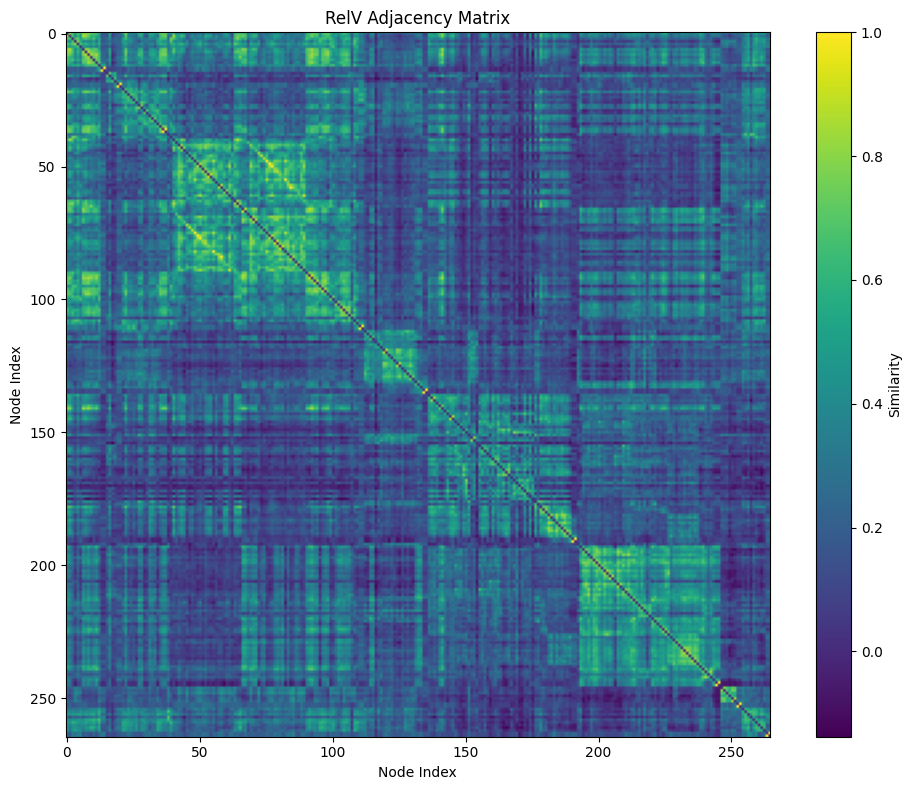

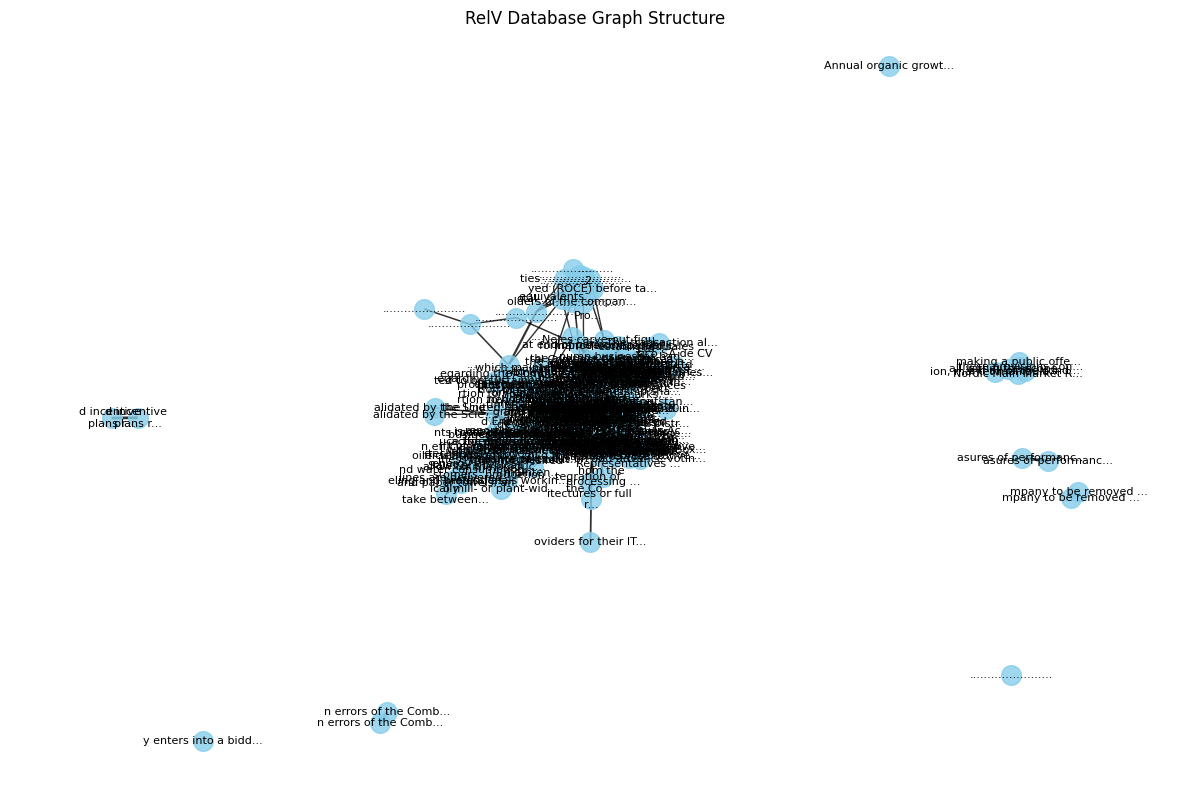

In [21]:
print_relv_info(relv_db)#Observe connections between the Synthetic Data and the Merger Data
vizualizer = RelVVisualizer(relv_db)
vizualizer.plot_adjacency_matrix()
vizualizer.plot_graph()

In [22]:
print(len(merger_text))

826314


In [23]:
def clear_relv_database(relv_db, filter_func=None, confirm=True):
    """
    Clear nodes from a RelV database.

    Args:
        relv_db: RelV database instance
        filter_func: Optional function to filter which nodes to delete.
                     Takes a Node object and returns True if it should be deleted.
        confirm: Whether to ask for confirmation before deleting

    Returns:
        Number of nodes deleted
    """
    # Get nodes to delete
    nodes_to_delete = []
    for node_id, node in relv_db.nodes.items():
        if filter_func is None or filter_func(node):
            nodes_to_delete.append(node_id)

    # Confirm deletion
    if confirm and nodes_to_delete:
        print(f"About to delete {len(nodes_to_delete)} nodes out of {len(relv_db.nodes)} total.")

        # Sample info about nodes to be deleted
        if nodes_to_delete:
            sample_node = relv_db.nodes[nodes_to_delete[0]]
            print(f"Sample node content: {sample_node.content[:100]}...")
            if sample_node.metadata:
                print(f"Sample metadata: {sample_node.metadata}")

        confirmation = input("Proceed with deletion? (y/n): ")
        if confirmation.lower() != 'y':
            print("Deletion cancelled.")
            return 0

    # Delete nodes
    deleted_count = 0
    for node_id in nodes_to_delete:
        if relv_db.remove_node(node_id):
            deleted_count += 1

    print(f"Successfully deleted {deleted_count} nodes.")
    print(f"Database now contains {len(relv_db.nodes)} nodes.")

    return deleted_count

# Helper function for clearing nodes
def _clear_matching_nodes(relv_db, filter_func):
    """
    Internal helper function to clear nodes matching a filter
    without confirmation (used by process_large_document)
    """
    nodes_to_delete = []
    for node_id, node in relv_db.nodes.items():
        if filter_func(node):
            nodes_to_delete.append(node_id)

    deleted_count = 0
    for node_id in nodes_to_delete:
        if relv_db.remove_node(node_id):
            deleted_count += 1

    return deleted_count

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import re
import time

# Analyze document to find optimal chunk size
print("=== DOCUMENT ANALYSIS ===")
print(f"Total text length: {len(merger_text):,} characters")

# Temporary function for testing different sizes
def test_chunk_size(text, size, overlap=50):
    # Save original parameters
    original_chunk_size = context_manager.relv_db.chunk_size
    original_overlap = context_manager.relv_db.overlap

    # Set test parameters
    context_manager.relv_db.chunk_size = size
    context_manager.relv_db.overlap = overlap

    # Test on sample
    sample_text = text[:100000] if len(text) > 100000 else text
    start_time = time.time()
    chunks = context_manager.relv_db.chunk_text_efficient(sample_text)
    elapsed = time.time() - start_time

    # Restore original parameters
    context_manager.relv_db.chunk_size = original_chunk_size
    context_manager.relv_db.overlap = original_overlap

    # Calculate projected total
    projected_total = int(len(chunks) * (len(text) / len(sample_text)))

    print(f"Chunk size {size}, overlap {overlap}:")
    print(f"  Created {len(chunks)} chunks from sample ({len(sample_text):,} chars)")
    print(f"  Projected total: ~{projected_total:,} chunks for full document")
    print(f"  Processing time: {elapsed:.2f}s")

    return chunks, projected_total
def large_chunk(file_text):
    # Test a few sizes
    test_sizes = [512, 256, 128]
    results = {}

    for size in test_sizes:
        chunks, projected = test_chunk_size(file_text, size)
        results[size] = {"chunks": chunks, "projected": projected}

    # Choose the most appropriate size
    best_size = 256  # Default to smaller chunks
    if results[512]["projected"] > 100:
        best_size = 512  # Use larger chunks if we'll get enough

    print(f"\n✓ Selected chunk size: {best_size}")
    print(f"✓ Expected chunks: ~{results[best_size]['projected']}")

    # Process the document with the optimal size
    print("\n=== PROCESSING DOCUMENT ===")

    # Clear existing nodes if desired
    existing_merger_nodes = []
    for node_id, node in context_manager.relv_db.nodes.items():
        if (node.metadata and "Document Type" in node.metadata and
            node.metadata["Document Type"] == "Merger"):
            existing_merger_nodes.append(node_id)

    if existing_merger_nodes:
        print(f"Removing {len(existing_merger_nodes)} existing merger nodes...")
        for node_id in existing_merger_nodes:
            context_manager.relv_db.remove_node(node_id)

    # Set optimal parameters
    original_chunk_size = context_manager.relv_db.chunk_size
    original_overlap = context_manager.relv_db.overlap
    context_manager.relv_db.chunk_size = best_size
    context_manager.relv_db.overlap = 50

    # Process in batches (50 pages per batch)
    batch_size = 100000  # ~50 pages
    all_nodes = []

    for i in range(0, len(file_text), batch_size):
        batch_end = min(i + batch_size, len(file_text))
        batch_text = file_text[i:batch_end]

        batch_start_page = i // 4000 + 1  # Rough estimate: ~4000 chars per page
        batch_end_page = batch_end // 4000 + 1

        print(f"\nProcessing batch {i//batch_size + 1}, approx. pages {batch_start_page}-{batch_end_page}...")

        batch_nodes = context_manager.add_document(
            batch_text,
            metadata={
                "Document Type": "Merger",
                "Source": "PDF",
                "Approx Pages": f"{batch_start_page}-{batch_end_page}",
                "Chunk Size": best_size
            }
        )

        all_nodes.extend(batch_nodes)
        print(f"Added {len(batch_nodes)} nodes from this batch")

    # Restore original parameters
    context_manager.relv_db.chunk_size = original_chunk_size
    context_manager.relv_db.overlap = original_overlap

    print(f"\n✓ Successfully added {len(all_nodes)} nodes to the database")


=== DOCUMENT ANALYSIS ===
Total text length: 826,314 characters


In [ ]:
large_chunk(merger_text)

Chunk size 512, overlap 50:
  Created 15 chunks from sample (100,000 chars)
  Projected total: ~123 chunks for full document
  Processing time: 0.00s
Chunk size 256, overlap 50:
  Created 5 chunks from sample (100,000 chars)
  Projected total: ~41 chunks for full document
  Processing time: 0.00s
Chunk size 128, overlap 50:
  Created 10 chunks from sample (100,000 chars)
  Projected total: ~82 chunks for full document
  Processing time: 0.00s

✓ Selected chunk size: 512
✓ Expected chunks: ~123

=== PROCESSING DOCUMENT ===

Processing batch 1, approx. pages 1-26...
Document chunked into 15 parts
Document processing completed in 0.08 seconds
Average time per chunk: 0.0052 seconds
Added 15 nodes from this batch

Processing batch 2, approx. pages 26-51...
Document chunked into 6 parts
Document processing completed in 0.05 seconds
Average time per chunk: 0.0085 seconds
Added 6 nodes from this batch

Processing batch 3, approx. pages 51-76...
Document chunked into 17 parts
Processed 8/17 chu

**TEXTRANK CHUNKING**

In [25]:
def chunk_text_by_textrank(text, context_manager=None, embedding_model=None,
                          min_length=100, max_length=800, overlap=20,
                          window_size=5, damping=0.85, threshold=0.001,
                          max_iterations=100):
    """
    Chunk text using TextRank algorithm to create concept-oriented nodes.

    Args:
        text (str): The text to chunk
        context_manager: Optional RelVContextManager to use for embeddings
        embedding_model: Optional embedding model to use if context_manager not provided
        min_length (int): Minimum chunk length
        max_length (int): Maximum chunk length
        overlap (int): Number of sentences to overlap between chunks
        window_size (int): Window size for TextRank algorithm
        damping (float): Damping factor for TextRank
        threshold (float): Convergence threshold
        max_iterations (int): Maximum number of iterations

    Returns:
        List[str]: List of chunks that represent coherent concepts
    """
    # Import required libraries
    import numpy as np
    import re
    from sklearn.metrics.pairwise import cosine_similarity

    # Function to split text into sentences
    def split_into_sentences(text):
        # Simple sentence splitting regex
        sentence_delimiters = r'[.!?][\s\n]+'
        sentences = re.split(sentence_delimiters, text)
        return [s.strip() for s in sentences if s.strip()]

    # Split text into sentences
    sentences = split_into_sentences(text)

    if len(sentences) < 3:
        # If very few sentences, return the text as a single chunk
        return [text]

    # Get embeddings for each sentence
    if context_manager is not None and hasattr(context_manager, '_get_embedding'):
        # Use context manager's embedding function if available
        embeddings = np.array([context_manager._get_embedding(sentence)
                              for sentence in sentences])
    elif embedding_model is not None:
        # Use provided embedding model
        embeddings = np.array(embedding_model.encode(sentences))
    else:
        # Fallback to simple TF-IDF like approach if no embedding model
        from sklearn.feature_extraction.text import TfidfVectorizer
        vectorizer = TfidfVectorizer(min_df=1)
        embeddings = vectorizer.fit_transform(sentences).toarray()

    # Normalize embeddings
    norms = np.linalg.norm(embeddings, axis=1).reshape(-1, 1)
    norms[norms == 0] = 1  # Avoid division by zero
    embeddings = embeddings / norms

    # Create similarity matrix
    n_sentences = len(sentences)
    similarity_matrix = np.zeros((n_sentences, n_sentences))

    # Fill similarity matrix
    for i in range(n_sentences):
        for j in range(n_sentences):
            if i != j and abs(i - j) < window_size:  # Consider only nearby sentences
                similarity_matrix[i][j] = cosine_similarity(
                    embeddings[i].reshape(1, -1),
                    embeddings[j].reshape(1, -1)
                )[0][0]

    # Normalize similarity matrix by row
    row_sums = similarity_matrix.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1  # Avoid division by zero
    similarity_matrix = similarity_matrix / row_sums

    # TextRank algorithm
    scores = np.ones(n_sentences) / n_sentences
    prev_scores = np.zeros(n_sentences)

    # Iterate until convergence or max iterations
    iteration = 0
    while np.sum(abs(scores - prev_scores)) > threshold and iteration < max_iterations:
        prev_scores = scores.copy()
        scores = (1 - damping) + damping * (similarity_matrix.T @ scores)
        iteration += 1

    # Identify boundaries based on significance drops in TextRank scores
    boundaries = []
    for i in range(1, n_sentences):
        # Mark boundary if significant drop in TextRank score
        if scores[i] < scores[i-1] * 0.7:  # 30% drop threshold
            boundaries.append(i)

    # Ensure we have reasonable chunks (not too small, not too large)
    # Add boundaries if chunks are too large
    i = 0
    while i < len(boundaries):
        if i == 0:
            chunk_size = boundaries[i]
        else:
            chunk_size = boundaries[i] - boundaries[i-1]

        if chunk_size > max_length // 20:  # Assuming average sentence is ~20 words
            # Add additional boundary to split this chunk
            mid_point = boundaries[i-1] + chunk_size // 2 if i > 0 else chunk_size // 2
            boundaries.insert(i, mid_point)
            # Don't increment i as we want to check the new chunks
        else:
            i += 1

    # If no boundaries found or first chunk is too large, add one
    if not boundaries or boundaries[0] > max_length // 20:
        boundaries.insert(0, min(n_sentences // 3, max_length // 20))

    # If the last chunk is too large, add a final boundary
    if n_sentences - boundaries[-1] > max_length // 20:
        boundaries.append(min(boundaries[-1] + (n_sentences - boundaries[-1]) // 2,
                           n_sentences - 1))

    # Create chunks based on boundaries
    chunks = []
    start_idx = 0

    for boundary in boundaries:
        # Create chunk with sentences from start_idx to boundary
        chunk = ' '.join(sentences[start_idx:boundary])

        # Add the chunk if it meets the minimum length requirement
        if len(chunk) >= min_length:
            chunks.append(chunk)

        # Move start index for next chunk, accounting for overlap
        start_idx = max(0, boundary - overlap)

    # Add the final chunk
    final_chunk = ' '.join(sentences[start_idx:])
    if len(final_chunk) >= min_length:
        chunks.append(final_chunk)

    # Combine chunks that are too small
    i = 0
    while i < len(chunks) - 1:
        if len(chunks[i]) < min_length:
            chunks[i] = chunks[i] + ' ' + chunks[i+1]
            chunks.pop(i+1)
        else:
            i += 1

    return chunks

def process_and_add_document_with_textrank(text, context_manager, embedding_model=None,
                                   metadata=None, remove_existing=False):
    """
    Process a document using TextRank for semantic chunking and add it to the RelV database.

    Args:
        text (str): The document text to process
        context_manager: The RelVContextManager instance
        embedding_model: Optional embedding model (will use context_manager's if not provided)
        metadata (dict): Optional metadata for the document nodes
        remove_existing (bool): Whether to remove existing nodes with the same metadata

    Returns:
        List[str]: List of added node IDs
    """
    if not text or len(text.strip()) == 0:
        print("Error: Empty text provided")
        return []

    print(f"Processing document ({len(text):,} characters)")

    # Get embedding model if not provided
    if embedding_model is None and hasattr(context_manager, 'embedding_model'):
        embedding_model = context_manager.embedding_model

    if embedding_model is None:
        print("Error: No embedding model provided or available from context manager")
        return []

    # Remove existing nodes if requested
    if remove_existing and metadata:
        print("Removing existing nodes matching metadata...")
        clear_relv_database(
            context_manager.relv_db,
            filter_func=lambda node: all(
                node.metadata.get(key) == value
                for key, value in metadata.items()
                if key in node.metadata
            ),
            confirm=False
        )

    # Create chunks using TextRank
    print("Creating concept-oriented chunks using TextRank...")
    chunks = chunk_text_by_textrank(
        text,
        context_manager=context_manager,
        embedding_model=embedding_model
    )

    print(f"Created {len(chunks)} concept-based chunks")

    # Process and add chunks
    added_nodes = []

    print(f"Adding chunks to database...")
    batch_size = min(32, len(chunks))  # Process in batches

    for i in range(0, len(chunks), batch_size):
        batch_chunks = chunks[i:i+batch_size]
        batch_embeddings = embedding_model.encode(batch_chunks)

        for j, (chunk, embedding) in enumerate(zip(batch_chunks, batch_embeddings)):
            # Add metadata about chunk position
            chunk_metadata = metadata.copy() if metadata else {}
            chunk_metadata.update({
                "Chunk": f"{i+j+1}/{len(chunks)}",
                "ChunkType": "TextRank",
                "CreatedAt": time.time()
            })

            # Add node to database
            node_id = context_manager.relv_db.add_node(
                content=chunk,
                embedding=embedding,
                metadata=chunk_metadata
            )
            added_nodes.append(node_id)

        print(f"Added {i+len(batch_chunks)}/{len(chunks)} chunks")

    print(f"Successfully added {len(added_nodes)} nodes to the database")

    # Test retrieval on a random chunk
    if len(chunks) > 0:
        all_chunks = chunks
        rand_chunk = np.random.choice(all_chunks)
        print("\nTesting retrieval with a random chunk...")
        print(f"Test query (first 100 chars): {rand_chunk[:100]}...")

        # Create embedding and search
        query_embedding = embedding_model.encode(rand_chunk[:200])
        results = context_manager.relv_db.query_by_embedding(query_embedding, k=3)

        if results:
            print(f"Found {len(results)} similar chunks")
            top_similarity = results[0][1]
            print(f"Top similarity score: {top_similarity:.4f}")

            if top_similarity > 0.8:
                print("✓ Retrieval test passed successfully")
            else:
                print("⚠ Retrieval similarity lower than expected")
        else:
            print("⚠ No similar chunks found in retrieval test")

    return added_nodes

In [26]:
clear_relv_database(relv_db)



About to delete 265 nodes out of 265 total.
Sample node content: MERGER AND LISTING PROSPECTUS 
SEPTEMBER 2, 2021
 
  
The Boards of Directors of Valmet Oyj (“Valmet...
Sample metadata: {'chunk_index': 0, 'total_chunks': 15, 'source': 'document', 'Document Type': 'Merger', 'Source': 'PDF', 'Approx Pages': '1-26', 'Chunk Size': 512}
Proceed with deletion? (y/n): y
FAISS running on CPU
FAISS index rebuilt with 264 vectors
FAISS running on CPU
FAISS index rebuilt with 263 vectors
FAISS running on CPU
FAISS index rebuilt with 262 vectors
FAISS running on CPU
FAISS index rebuilt with 261 vectors
FAISS running on CPU
FAISS index rebuilt with 260 vectors
FAISS running on CPU
FAISS index rebuilt with 259 vectors
FAISS running on CPU
FAISS index rebuilt with 258 vectors
FAISS running on CPU
FAISS index rebuilt with 257 vectors
FAISS running on CPU
FAISS index rebuilt with 256 vectors
FAISS running on CPU
FAISS index rebuilt with 255 vectors
FAISS running on CPU
FAISS index rebuilt with 254 vect

265

In [27]:
process_and_add_document_with_textrank(merger_text,context_manager)

Processing document (826,314 characters)
Creating concept-oriented chunks using TextRank...
Created 272 concept-based chunks
Adding chunks to database...
Added 32/272 chunks
Added 64/272 chunks
Added 96/272 chunks
Added 128/272 chunks
Added 160/272 chunks
Added 192/272 chunks
Added 224/272 chunks
Added 256/272 chunks
Added 272/272 chunks
Successfully added 272 nodes to the database

Testing retrieval with a random chunk...
Test query (first 100 chars): The Board of Directors’ responsibility for the pro forma financial information   
The Board of Direc...
Found 3 similar chunks
Top similarity score: 0.6943
⚠ Retrieval similarity lower than expected


['31c50b06-bebc-43d2-8800-0f19c7e2e803',
 'e1c12600-5ac4-4ce9-86f2-2bbcaf5e007d',
 'fef1183c-2ca5-4ca6-9e3c-dbfab8ac50df',
 '903500f5-c4e7-40a6-863e-e5988f93c789',
 '8427bcfa-80fe-4290-9157-4ea45040d31d',
 '76c8e066-9773-48e5-94b3-565e64b32958',
 '70edece8-ad56-409d-bf53-5cdfff60fbf9',
 '52db47f4-fc3f-476e-bd14-55cc010f7d99',
 'a3cb6718-ba68-4835-ae89-96269795612e',
 '50a2f1a4-33f2-4ed9-bbbf-a5f5a5dc7a62',
 '11c4d806-d30c-44e0-a630-394904b739ca',
 '00f75857-c895-4aab-8b01-882a65464c51',
 '357f5025-c717-4e26-a004-e47a6fa81bf0',
 '80779626-5ed1-4022-a949-3f10fdbda6a0',
 'd178208c-6d82-4be9-89a4-84b4e016e54a',
 '8922a9fa-8ed6-45a8-9d22-189f7ac48d3c',
 'a8451294-e15a-4a57-b973-c95cbe83c9cb',
 '1aadd7f4-17b9-4946-9477-f2a3d8650c53',
 'a2adc9a4-cdc1-4996-abd2-1ae2f42fdb67',
 'e8bf00ee-a90e-4fcb-93af-3b1063179e94',
 '054aa63f-d62a-47f2-8460-dd86584b6dcd',
 '58f7cc86-0994-484a-8fa3-eff5cefe3e6e',
 'b38ac449-82ba-4f6e-bf0d-1864a2fcaefc',
 '95896bf8-8fc1-4597-b598-7eee20141b99',
 '1a3c6fed-6572-

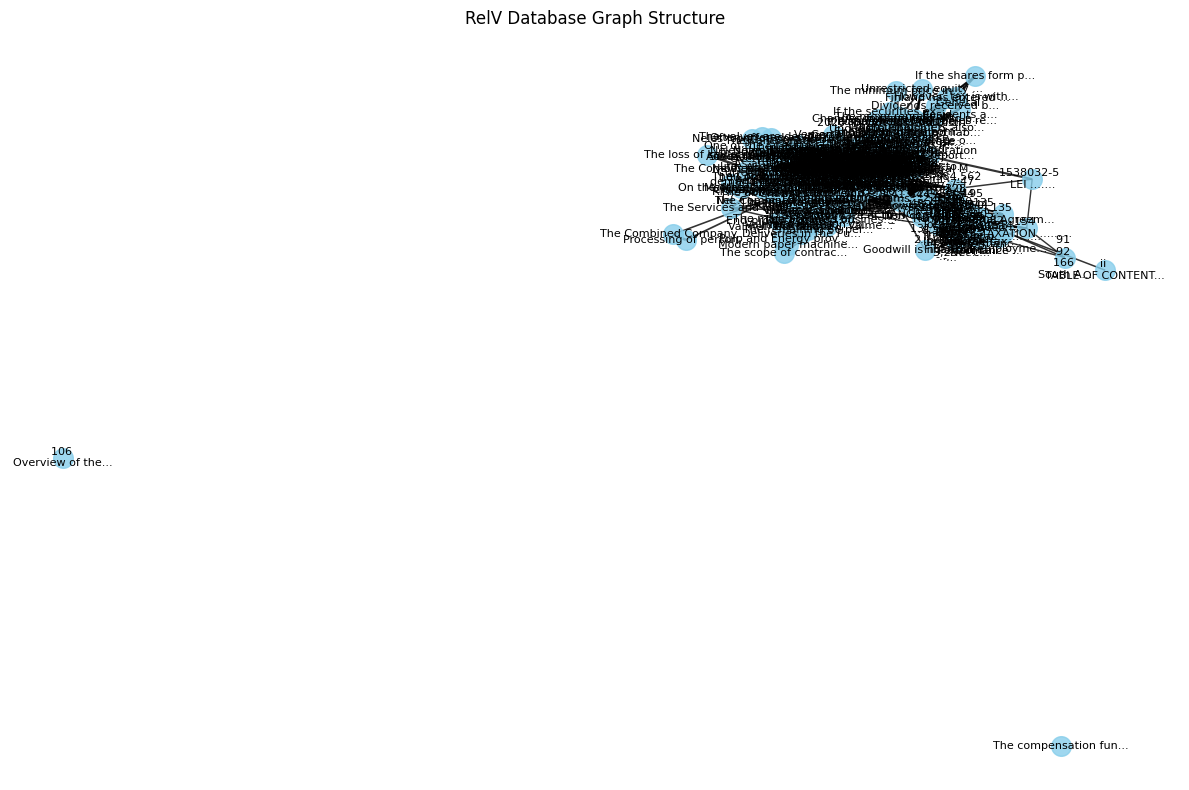

Nodes in the RelV database:
  Node ID: 31c50b06-bebc-43d2-8800-0f19c7e2e803
    Content: MERGER AND LISTING PROSPECTUS 
SEPTEMBER 2, 2021
 
  
The Boards of Directors of Valmet Oyj (“Valmet”) and Neles Corporation (“Neles”) have, on July 2, 2021, agreed upon the combination of the 
two companies by signing a combination agreement (the “Combination Agreement”) and a merger plan (the “Merger Plan”), according to 
which Neles shall be merged into Valmet through a statutory absorption merger in accordance with the Limited Liability Companies Act 
(624/2006, as amended) (the “Finnish Companies Act”) whereby all assets and liabilities of Neles shall be transferred without a liquidation 
procedure to Valmet (the “Merger”) The Boards of Directors of Valmet and Neles have on August 9, 2021 proposed that the Extraordinary 
General Meetings (“EGM”) of Valmet and Neles convened to be held on September 22, 2021 would resolve upon the Merger as set forth in the 
Merger Plan The completion of the Mer

In [28]:
vizualizer.plot_graph()

In [29]:
def export_nodes_to_json(relv_db, output_file="relv_nodes.json", pretty_print=True):
    """
    Export all nodes in the RelV database to a JSON file.

    Args:
        relv_db: The RelV instance
        output_file (str): The path to the output JSON file
        pretty_print (bool): Whether to format the JSON with indentation

    Returns:
        dict: Summary of the export operation
    """
    import json
    import numpy as np
    from datetime import datetime
    import os

    class NumpyEncoder(json.JSONEncoder):
        """Custom encoder for numpy data types"""
        def default(self, obj):
            if isinstance(obj, np.ndarray):
                return obj.tolist()
            if isinstance(obj, np.integer):
                return int(obj)
            if isinstance(obj, np.floating):
                return float(obj)
            if isinstance(obj, datetime):
                return obj.isoformat()
            return super().default(obj)

    print(f"Exporting nodes to {output_file}...")

    # Get all nodes from the database
    nodes_data = []

    # Get all node IDs
    all_node_ids = list(relv_db.nodes.keys())

    # Process each node
    for node_id in all_node_ids:
        try:
            node = relv_db.get_node(node_id)

            # Create a serializable node data structure
            node_data = {
                "id": node.id,
                "content": node.content,
                "embedding": node.embedding,  # Will be handled by NumpyEncoder
                "metadata": node.metadata,
                "age": node.age,
                "creation_time": node.creation_time,
                # Add related nodes info
                "related_nodes": relv_db.get_related_nodes(node_id)
            }

            nodes_data.append(node_data)
        except Exception as e:
            print(f"Error processing node {node_id}: {str(e)}")

    # Prepare export data with metadata
    export_data = {
        "metadata": {
            "export_time": datetime.now().isoformat(),
            "node_count": len(nodes_data),
            "embedding_dim": relv_db.embedding_dim,
            "similarity_threshold": relv_db.similarity_threshold
        },
        "nodes": nodes_data
    }

    # Create directory if it doesn't exist
    os.makedirs(os.path.dirname(os.path.abspath(output_file)), exist_ok=True)

    # Write to file
    with open(output_file, 'w', encoding='utf-8') as f:
        if pretty_print:
            json.dump(export_data, f, cls=NumpyEncoder, indent=2, ensure_ascii=False)
        else:
            json.dump(export_data, f, cls=NumpyEncoder, ensure_ascii=False)

    print(f"Successfully exported {len(nodes_data)} nodes to {output_file}")

    return {
        "file": output_file,
        "node_count": len(nodes_data),
        "size_bytes": os.path.getsize(output_file)
    }

def import_nodes_from_json(relv_db, input_file, replace_existing=False):
    """
    Import nodes from a JSON file into the RelV database.

    Args:
        relv_db: The RelV instance
        input_file (str): The path to the input JSON file
        replace_existing (bool): Whether to replace existing nodes with the same ID

    Returns:
        dict: Summary of the import operation
    """
    import json
    import numpy as np

    print(f"Importing nodes from {input_file}...")

    # Read the JSON file
    with open(input_file, 'r', encoding='utf-8') as f:
        import_data = json.load(f)

    # Extract metadata
    metadata = import_data.get("metadata", {})
    print(f"File contains {metadata.get('node_count', 'unknown')} nodes")

    # Check embedding dimension compatibility
    if metadata.get("embedding_dim") != relv_db.embedding_dim:
        print(f"Warning: Embedding dimension mismatch. File: {metadata.get('embedding_dim')}, RelV: {relv_db.embedding_dim}")

    # Process each node
    added_count = 0
    skipped_count = 0
    error_count = 0

    for node_data in import_data.get("nodes", []):
        node_id = node_data.get("id")

        # Check if node already exists
        if node_id in relv_db.nodes and not replace_existing:
            skipped_count += 1
            continue

        try:
            # Convert embedding back to numpy array
            embedding = np.array(node_data.get("embedding"))

            # Create the node
            relv_db.add_node(
                content=node_data.get("content", ""),
                embedding=embedding,
                metadata=node_data.get("metadata", {}),
                node_id=node_id  # Use the same ID
            )

            # Set the age if it exists
            if "age" in node_data:
                node = relv_db.get_node(node_id)
                node.age = node_data.get("age", 0)

            added_count += 1

            # Print progress in increments of 100 nodes
            if added_count % 100 == 0:
                print(f"Imported {added_count} nodes so far...")

        except Exception as e:
            print(f"Error importing node {node_id}: {str(e)}")
            error_count += 1

    # Rebuild the FAISS index after importing all nodes
    print("Rebuilding FAISS index...")
    relv_db._rebuild_faiss_index()

    print(f"Import summary: {added_count} added, {skipped_count} skipped, {error_count} errors")

    return {
        "added": added_count,
        "skipped": skipped_count,
        "errors": error_count,
        "total": added_count + skipped_count + error_count
    }

# Example command to export nodes
# export_result = export_nodes_to_json(relv_db, "relv_export.json")
# print(f"Exported {export_result['node_count']} nodes to {export_result['file']}")

# Example command to import nodes
# import_result = import_nodes_from_json(relv_db, "relv_export.json")
# print(f"Imported {import_result['added']} nodes from file")

# Example to run the full export/import example
# export_import_example(relv_db)

In [ ]:
export_result = export_nodes_to_json(relv_db, "relv_export_sim75.json")
print(f"Exported {export_result['node_count']} nodes to {export_result['file']}")

Exporting nodes to relv_export_sim75.json...
Successfully exported 272 nodes to relv_export_sim75.json
Exported 272 nodes to relv_export_sim75.json


In [30]:
def print_node_context(relv_db, node_id, k_related=3, include_related=True, max_content_length=500):
    """
    Print the content and context information for a specific node.

    Args:
        relv_db: The RelV database instance
        node_id: The ID of the node to print
        k_related: Number of related nodes to include
        include_related: Whether to include related nodes
        max_content_length: Maximum length of content to print
    """
    try:
        # Get the node
        node = relv_db.get_node(node_id)

        # Print node basic info
        print(f"\n===== NODE {node_id} =====")
        print(f"Age: {node.age}")
        print(f"Creation Time: {time.ctime(node.creation_time)}")

        # Print metadata
        print("\n--- METADATA ---")
        for key, value in node.metadata.items():
            print(f"{key}: {value}")

        # Print content (truncated if too long)
        print("\n--- CONTENT ---")
        content = node.content
        if len(content) > max_content_length:
            content = content[:max_content_length] + "... [truncated]"
        print(content)

        # Print related nodes
        if include_related:
            related_nodes = relv_db.get_related_nodes(node_id, k=k_related)
            print(f"\n--- {len(related_nodes)} RELATED NODES ---")

            for i, (related_id, similarity) in enumerate(related_nodes):
                print(f"\n{i+1}. Node {related_id} (Similarity: {similarity:.4f})")
                try:
                    related_node = relv_db.get_node(related_id)
                    related_content = related_node.content
                    if len(related_content) > max_content_length // 2:
                        related_content = related_content[:max_content_length // 2] + "... [truncated]"
                    print(related_content)
                except Exception as e:
                    print(f"Error retrieving related node: {str(e)}")

    except Exception as e:
        print(f"Error: {str(e)}")
        print(f"Node {node_id} not found or could not be accessed.")

# Example usage:
# print_node_context(relv_db, "node_id_here")

In [44]:
synth_path = "/content/synthetic_valmet_context.pdf"
synth_text = process_pdf(synth_path)
synth_nodes = process_and_add_document_with_textrank(synth_text,context_manager)

PDF contains embedded text. Using PyMuPDF for extraction...
Processing document (1,062 characters)
Creating concept-oriented chunks using TextRank...
Created 2 concept-based chunks
Adding chunks to database...
Added 2/2 chunks
Successfully added 2 nodes to the database

Testing retrieval with a random chunk...
Test query (first 100 chars): Valmet's organizational leadership strategy has emphasized regional alignment since 2013 According t...
Found 3 similar chunks
Top similarity score: 0.6064
⚠ Retrieval similarity lower than expected


In [72]:
query = "Explain each parties role in the merger, and what this merger will set forth for the future"
query_embedding = context_manager.embedding_model.encode(query)
results = context_manager.relv_db.query_by_embedding(query_embedding, k=5)
answer = context_manager.query_optimized(query, k=5, explore_depth=15)

Using cached response (similarity: 1.00)


In [34]:
for i in results:
  print_node_context(context_manager.relv_db, i[0])

5

===== NODE 779e2afb-8cee-4e9e-8d1b-89274347ee05 =====
Age: 0
Creation Time: Sun Apr 27 16:08:03 2025

--- METADATA ---
Chunk: 78/272
ChunkType: TextRank
CreatedAt: 1745770083.8340387

--- CONTENT ---
In the event the Combination Agreement is terminated due to a party’s failure to fulfil any undertaking or 
obligation under the Combination Agreement resulting in the failure of the completion of the Merger to occur by the long-
stop date set out in (i) above, the parties have agreed on the payment of cost coverage of agreed amounts Such 
reimbursement shall not exceed EUR 12 million in the aggregate, except that, in the event either party’s EGM rejects the 
Merger, such reimbursement (payable ... [truncated]

--- 3 RELATED NODES ---

1. Node 8d0da84c-f20f-4387-bb06-b463a35670b6 (Similarity: 0.7893)
See “Risk Factors – Risks Related to the Merger” Background for the Merger  
On July 2, 2021, the Boards of Directors of Valmet and Neles agreed upon the combination of the two companies by

In [46]:
print(answer)

5

In the context of the provided information, the merger refers to the combination of Valmet and Neles. The Combined Company will be created by the merger of these two entities. Both Valmet and Neles are significant businesses with approximately 17,240 employees across over 40 countries as of June 30, 2021.

Each party's role in the merger is as follows:

Valmet: Valmet is a leading industrial company focused on providing technologies, automation solutions, and services for various industries such as pulp, paper, energy, and mining. Valmet will bring its expertise in technology, automation, and services to the Combined Company.

Neles: Neles is a global flow control company offering valve and service solutions for process industries. Neles will contribute its extensive knowledge in valves and services to the Combined Company.

The merger of Valmet and Neles will set forth several implications for the future:

1. Increased competitiveness: The Combined Company will have a broader produ

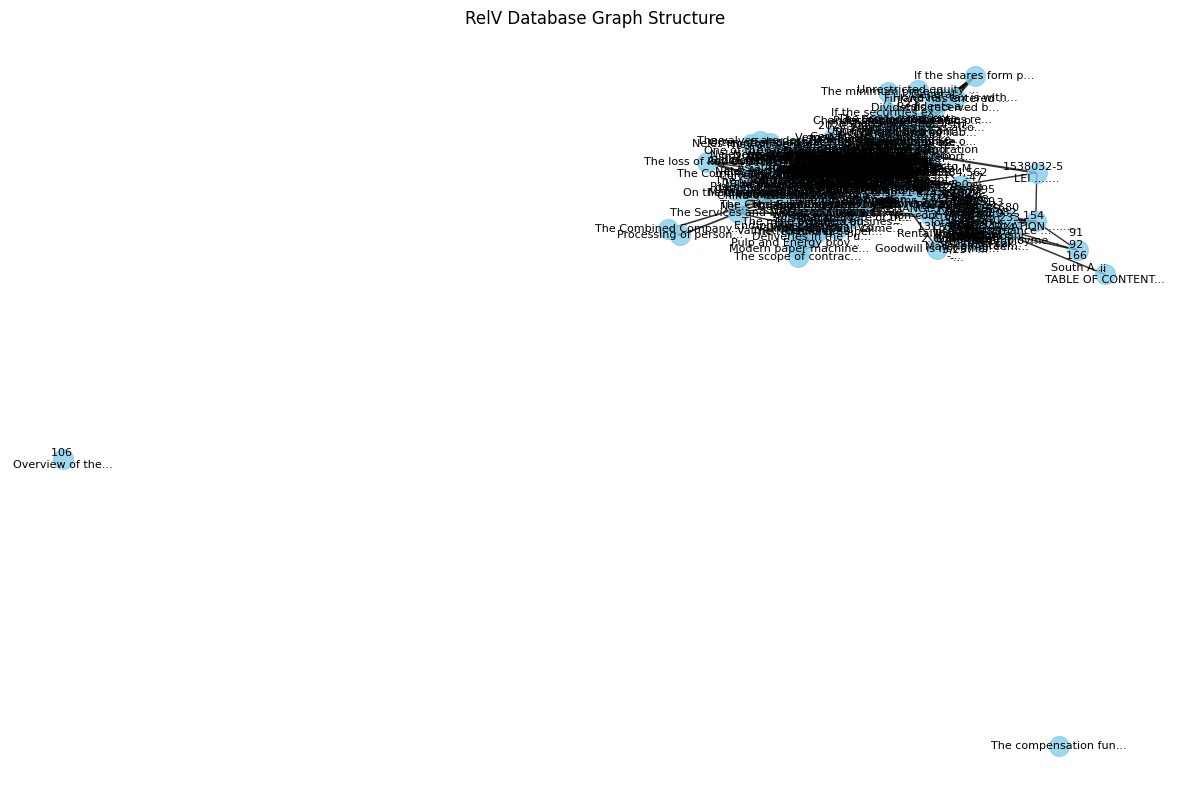

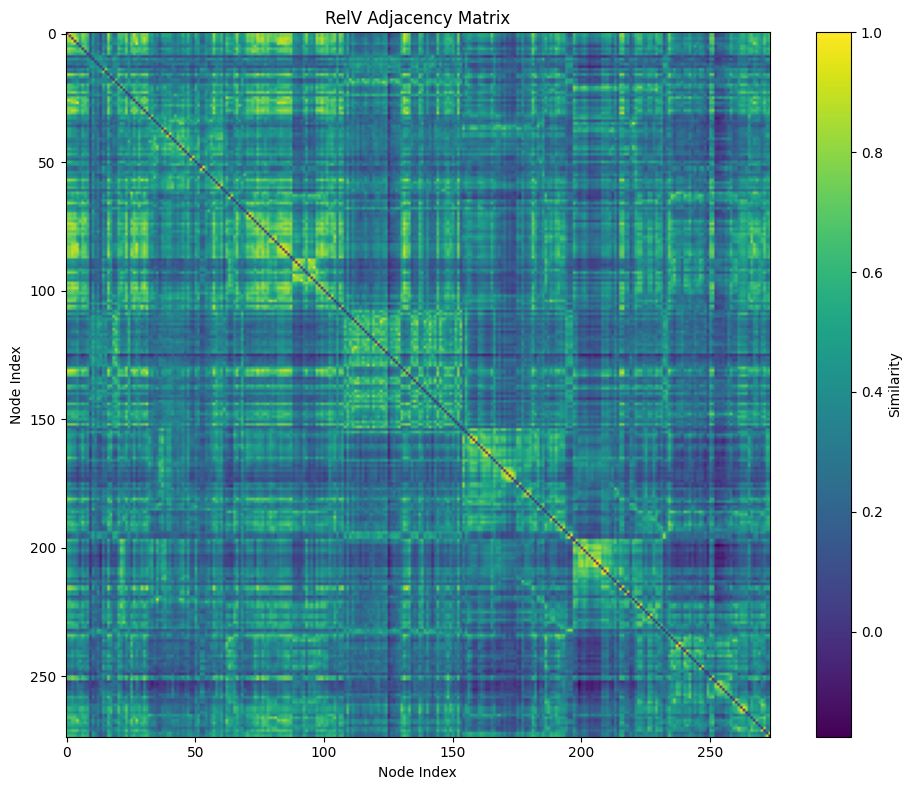

In [53]:
vizualizer.plot_graph()
vizualizer.plot_adjacency_matrix()

<ipython-input-55-33546d938133>:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20', max(8, len(source_to_color)))


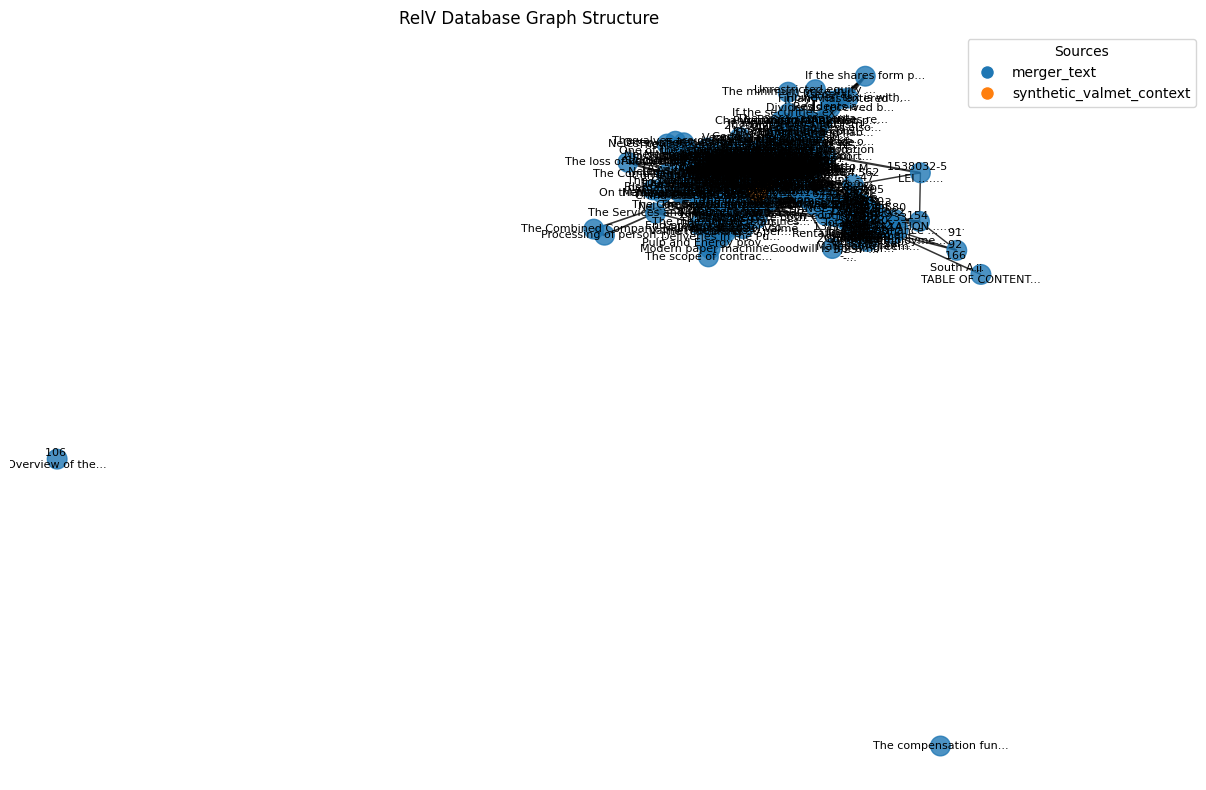

<ipython-input-55-33546d938133>:175: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20', max(8, len(unique_sources)))


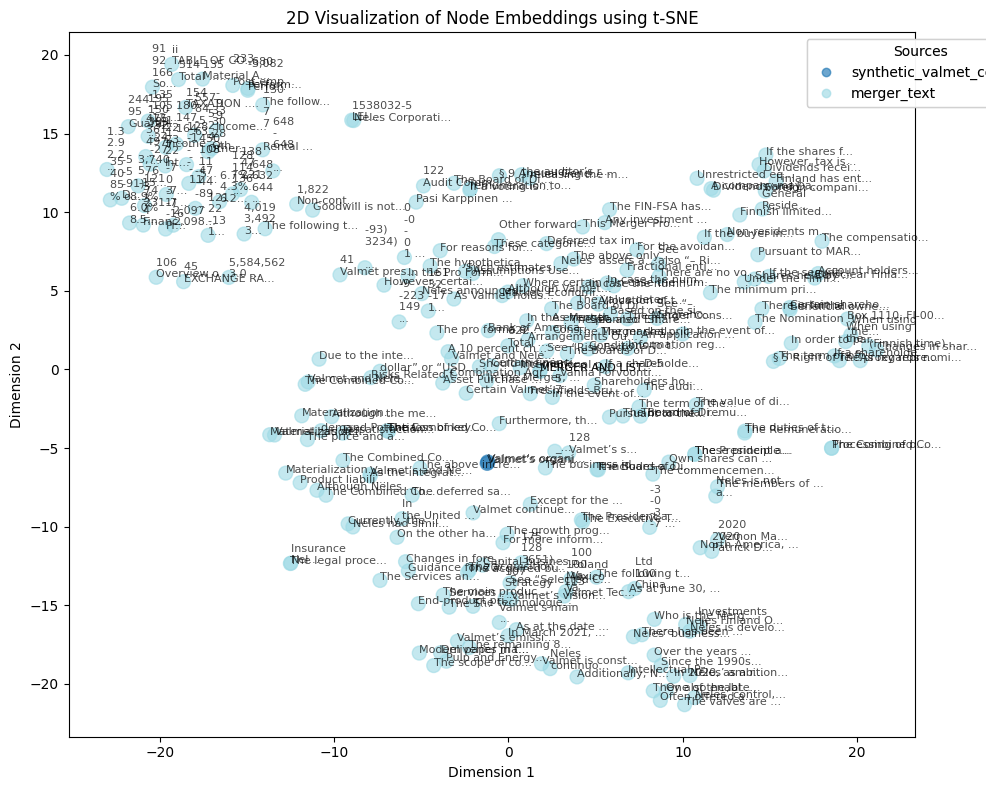

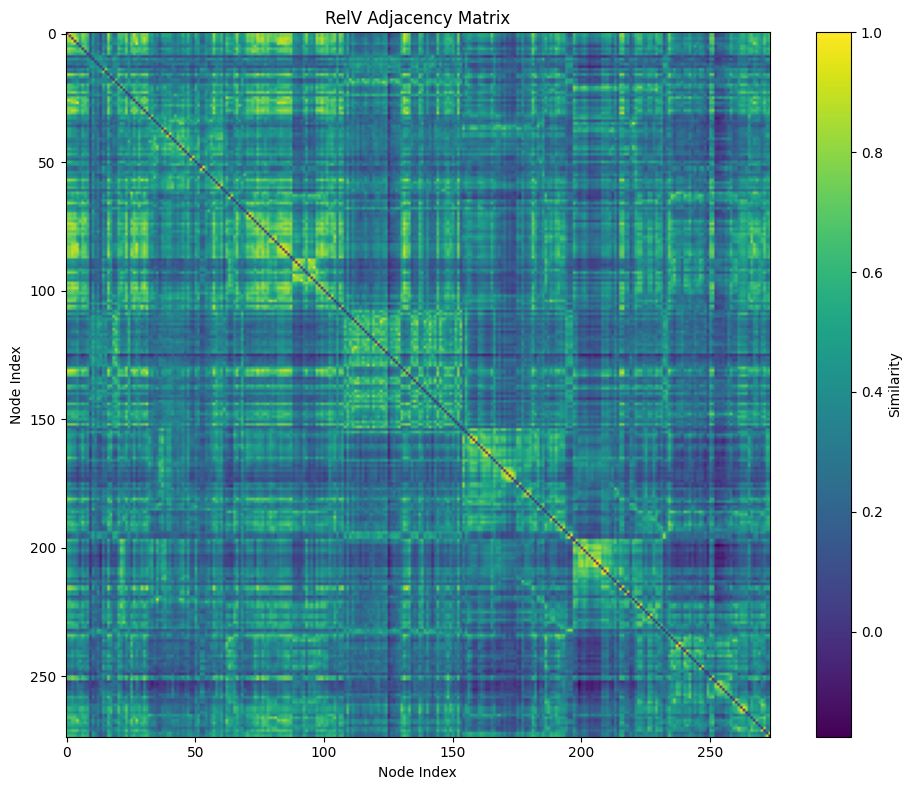

Detected 7 communities

Source distribution within communities:
Community 0: 85 nodes
  Sources: merger_text: 84, synthetic_valmet_context: 1
Community 1: 51 nodes
  Sources: merger_text: 51
Community 2: 1 nodes
  Sources: merger_text: 1
Community 6: 43 nodes
  Sources: merger_text: 43
Community 4: 52 nodes
  Sources: merger_text: 52
Community 5: 41 nodes
  Sources: merger_text: 40, synthetic_valmet_context: 1
Community 3: 1 nodes
  Sources: merger_text: 1


<ipython-input-55-33546d938133>:291: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20', max_community + 1)


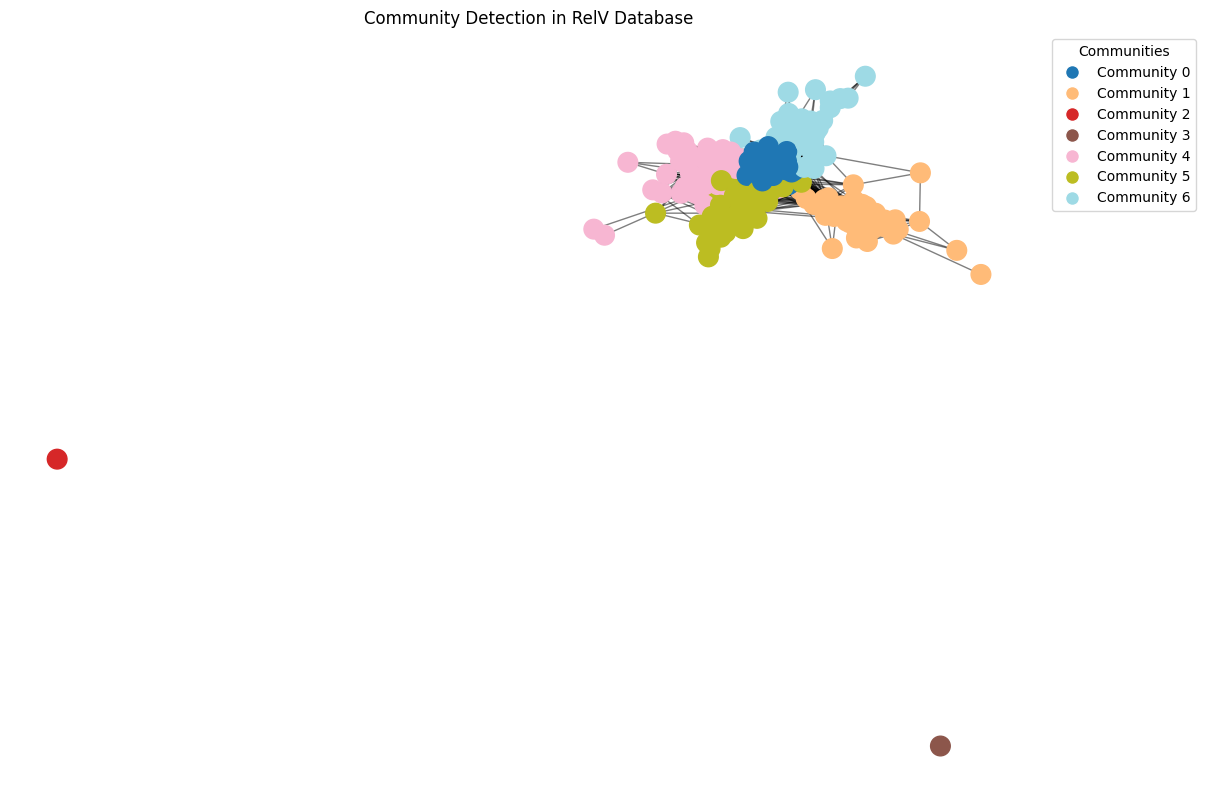

Community 0: 85 nodes
Community 1: 51 nodes
Community 2: 1 nodes
Community 6: 43 nodes
Community 4: 52 nodes
Community 5: 41 nodes
Community 3: 1 nodes


<ipython-input-55-33546d938133>:369: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  community_cmap = plt.cm.get_cmap('tab20', max_community + 1)
<ipython-input-55-33546d938133>:401: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  source_cmap = plt.cm.get_cmap('tab10', max(8, len(source_list)))


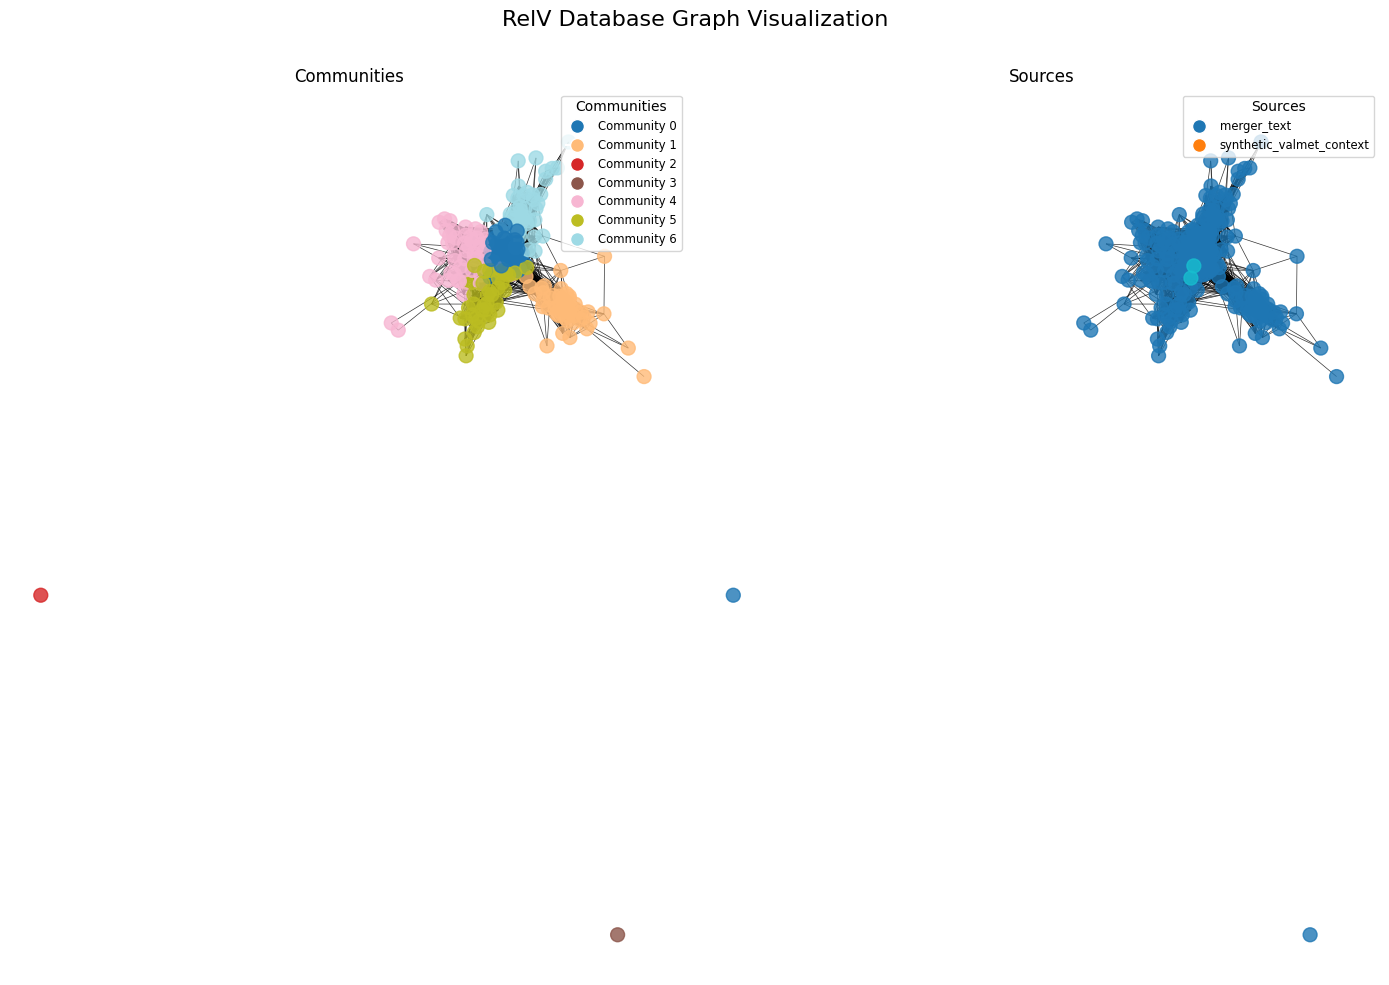

({'42daf58d-b36c-49d6-b28e-eb59a460380a': 0,
  'b809c4f9-4cf7-48ba-8b1e-24502dc2734f': 0,
  'a36658f1-61ce-4d08-9b89-7fe7b35e389a': 0,
  'a7cae316-ba50-4f66-a1d9-f70b966d7936': 0,
  'f9d57c14-063a-48eb-8ff1-741f8441d982': 0,
  'c480c706-173b-4404-9b95-ceefa20b1563': 0,
  '1d21a5e7-f711-4dec-8fcc-6778db2014aa': 0,
  'dc9167f6-4a91-4656-9512-40e24ba4ae3b': 0,
  '63ebd02a-9d70-4704-a55c-c23674ce20e9': 0,
  'a2b7d4e5-b972-403f-8ab9-b770356dea66': 1,
  'd299594f-d4c3-4c70-9b3b-021e56ec2990': 1,
  'a8eafffb-839d-4991-8290-abfc5ab502e1': 2,
  '34f1a3df-90d5-4989-bc26-eb0f22a2b418': 1,
  '8784434c-1c4b-488a-8044-703d4edca272': 1,
  '5c2653a3-4793-4d7d-ac85-5f38595c3141': 6,
  '1c33c441-3ef1-457f-a3f1-c8d945b1cc07': 1,
  '29ce604a-544a-45de-b0fe-77726d47be67': 0,
  '65239bf7-fdd0-4461-8921-75a846b34e97': 0,
  '17f9fd8c-3136-445b-ab3d-f871978e038d': 1,
  'e4680ceb-fca3-4cc8-b346-0ac435030a5e': 1,
  'e42af0a2-ec61-46fc-9db5-03060f4f81e2': 0,
  '857e867c-c8b9-4507-b25b-163d3c1b9170': 4,
  '84ff7fc

In [62]:

# After setting up your RelV database:
visualizer = RelVVisualizer(relv_db)
visualizer.plot_graph(color_by_source=True)  # Color nodes by source
visualizer.plot_embeddings_2d(color_by_source=True)  # Color t-SNE by source
visualizer.plot_adjacency_matrix()
visualizer.community_analysis(show_source_distribution=True)  # Show source distribution in communities
visualizer.plot_source_and_community()  # Show both source and community in side-by-side plots

In [57]:
clear_relv_database(relv_db)

About to delete 274 nodes out of 274 total.
Sample node content: MERGER AND LISTING PROSPECTUS 
SEPTEMBER 2, 2021
 
  
The Boards of Directors of Valmet Oyj (“Valmet...
Sample metadata: {'Chunk': '1/272', 'ChunkType': 'TextRank', 'CreatedAt': 1745770082.1344728}
Proceed with deletion? (y/n): y
FAISS running on CPU
FAISS index rebuilt with 273 vectors
FAISS running on CPU
FAISS index rebuilt with 272 vectors
FAISS running on CPU
FAISS index rebuilt with 271 vectors
FAISS running on CPU
FAISS index rebuilt with 270 vectors
FAISS running on CPU
FAISS index rebuilt with 269 vectors
FAISS running on CPU
FAISS index rebuilt with 268 vectors
FAISS running on CPU
FAISS index rebuilt with 267 vectors
FAISS running on CPU
FAISS index rebuilt with 266 vectors
FAISS running on CPU
FAISS index rebuilt with 265 vectors
FAISS running on CPU
FAISS index rebuilt with 264 vectors
FAISS running on CPU
FAISS index rebuilt with 263 vectors
FAISS running on CPU
FAISS index rebuilt with 262 vectors
FAISS run

274

In [59]:
process_and_add_document_with_textrank(merger_text,context_manager,metadata={"source": "merger_text"})

Processing document (826,314 characters)
Creating concept-oriented chunks using TextRank...
Created 272 concept-based chunks
Adding chunks to database...
Added 32/272 chunks
Added 64/272 chunks
Added 96/272 chunks
Added 128/272 chunks
Added 160/272 chunks
Added 192/272 chunks
Added 224/272 chunks
Added 256/272 chunks
Added 272/272 chunks
Successfully added 272 nodes to the database

Testing retrieval with a random chunk...
Test query (first 100 chars): As the integrated Neles quote-to-order-to-cash solution supports Neles’ global sales and 
operations...
Found 3 similar chunks
Top similarity score: 0.6205
⚠ Retrieval similarity lower than expected


['42daf58d-b36c-49d6-b28e-eb59a460380a',
 'b809c4f9-4cf7-48ba-8b1e-24502dc2734f',
 'a36658f1-61ce-4d08-9b89-7fe7b35e389a',
 'a7cae316-ba50-4f66-a1d9-f70b966d7936',
 'f9d57c14-063a-48eb-8ff1-741f8441d982',
 'c480c706-173b-4404-9b95-ceefa20b1563',
 '1d21a5e7-f711-4dec-8fcc-6778db2014aa',
 'dc9167f6-4a91-4656-9512-40e24ba4ae3b',
 '63ebd02a-9d70-4704-a55c-c23674ce20e9',
 'a2b7d4e5-b972-403f-8ab9-b770356dea66',
 'd299594f-d4c3-4c70-9b3b-021e56ec2990',
 'a8eafffb-839d-4991-8290-abfc5ab502e1',
 '34f1a3df-90d5-4989-bc26-eb0f22a2b418',
 '8784434c-1c4b-488a-8044-703d4edca272',
 '5c2653a3-4793-4d7d-ac85-5f38595c3141',
 '1c33c441-3ef1-457f-a3f1-c8d945b1cc07',
 '29ce604a-544a-45de-b0fe-77726d47be67',
 '65239bf7-fdd0-4461-8921-75a846b34e97',
 '17f9fd8c-3136-445b-ab3d-f871978e038d',
 'e4680ceb-fca3-4cc8-b346-0ac435030a5e',
 'e42af0a2-ec61-46fc-9db5-03060f4f81e2',
 '857e867c-c8b9-4507-b25b-163d3c1b9170',
 '84ff7fce-52e3-4789-8951-ef1b83a7faaa',
 '9eca95a8-2d6a-45d9-b650-f6b93fb26514',
 'da47d74a-4491-

In [60]:
process_and_add_document_with_textrank(synth_text,context_manager,metadata={"source": "synthetic_valmet_context"})

Processing document (1,062 characters)
Creating concept-oriented chunks using TextRank...
Created 2 concept-based chunks
Adding chunks to database...
Added 2/2 chunks
Successfully added 2 nodes to the database

Testing retrieval with a random chunk...
Test query (first 100 chars): Valmet's organizational leadership strategy has emphasized regional alignment since 2013 According t...
Found 3 similar chunks
Top similarity score: 0.6064
⚠ Retrieval similarity lower than expected


['9b56d4d7-8114-49eb-becf-983df3e9e123',
 '7b7e922b-256c-4a45-84ee-4a31e9e5f553']

In [75]:
query = "Go into detail about Valmet's training program, and how their policies could have implications in the merger."
query_embedding = context_manager.embedding_model.encode(query)
results = context_manager.relv_db.query_by_embedding(query_embedding, k=5)
answer = context_manager.query_optimized(query, k=5)

Detected 7 communities using Louvain method
Initial nodes belong to 1 different communities
Found 5 initial nodes via vector similarity
Added 0 nodes via DFS and 85 nodes via BFS
Found 29 nodes from different communities


Llama.generate: 1622 prefix-match hit, remaining 1 prompt tokens to eval

llama_print_timings:        load time =    3580.83 ms
llama_print_timings:      sample time =     259.51 ms /   425 runs   (    0.61 ms per token,  1637.68 tokens per second)
llama_print_timings: prompt eval time =   40133.86 ms /     2 tokens (20066.93 ms per token,     0.05 tokens per second)
llama_print_timings:        eval time =  295803.43 ms /   424 runs   (  697.65 ms per token,     1.43 tokens per second)
llama_print_timings:       total time =  297268.10 ms /   426 tokens


Query processing: 0.21s context prep, 297.28s LLM, 297.49s total


In [76]:
print(answer)


Valmet does not provide specific information about its training program in the given text. However, we can infer that as a technology industry company, Valmet may invest in training and development for its employees to maintain expertise in their fields and stay competitive. The company's focus on engaging globally in designing, developing, manufacturing, building, and trading machines, instruments, equipment, production plants, and spare parts suggests that continuous learning is essential for its workforce.

In the context of a merger, Valmet's training policies could have implications in several ways:

1. Integration of Workforces: A merger between Valmet and another company would involve integrating their workforces. The training programs of both companies would need to be evaluated for compatibility and effectiveness. If there are significant differences in the training approaches, it may lead to challenges in ensuring a consistent level of skills and knowledge across the combine

In [86]:
query = "Go into detail about Valmet's training program, and how they relate to the merger."
query_embedding = context_manager.embedding_model.encode(query)
results = context_manager.relv_db.query_by_embedding(query_embedding, k=5)
answer = context_manager.query_optimized(query, k=5)

Detected 7 communities using Louvain method
Initial nodes belong to 2 different communities
Found 5 initial nodes via vector similarity
Added 0 nodes via DFS and 71 nodes via BFS
Found 2 nodes from different communities


Llama.generate: 1648 prefix-match hit, remaining 1 prompt tokens to eval

llama_print_timings:        load time =    3580.83 ms
llama_print_timings:      sample time =     233.58 ms /   394 runs   (    0.59 ms per token,  1686.80 tokens per second)
llama_print_timings: prompt eval time =  132980.95 ms /     2 tokens (66490.48 ms per token,     0.02 tokens per second)
llama_print_timings:        eval time =  272143.22 ms /   393 runs   (  692.48 ms per token,     1.44 tokens per second)
llama_print_timings:       total time =  273927.98 ms /   395 tokens


Query processing: 0.27s context prep, 273.94s LLM, 274.21s total


In [89]:
print(answer)


Valmet's training program for new executives includes a rotation through five markets, including Vietnam and Morocco. This program is not directly related to the merger between Valmet and Neles, as it is a part of Valmet's organizational leadership strategy that has been in place since 2013. However, the merger may provide new opportunities for executives who have gone through this training program to apply their skills and knowledge in integrating the two companies. Additionally, the merger may expand Valmet's presence in some of these markets, making them even more relevant for executives.

The merger itself is subject to various conditions, including approval by the Extraordinary General Meetings (EGMs) of both Valmet and Neles, obtaining necessary merger control approvals from competition authorities, and fulfilling other conditions set forth in the Combination Agreement and Merger Plan. The completion of the merger is also dependent on the registration of the execution of the mer

**EXPERIMENT 1: SINGLE DOCUMENT RETRIEVAL**

In [ ]:
clear_relv_database(relv_db)

In [ ]:
#ITERATE THROUGH SET OF QUESTIONS, PULL ANSWERS, COMPARE ANSWERS MANUALLY(Maybe use LLM for evaluation)